In [100]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
my_palette = sns.color_palette(my_colors) # Create a seaborn palette object
sns.set_palette(my_palette)  # Use the custom palette with a seaborn function
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings(action='ignore')
import catboost as cb

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
add_train = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

display(train.head(), test.head(), add_train.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [102]:
train.shape, test.shape, add_train.shape

((1677, 35), (1119, 34), (1470, 35))

In [103]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')
add_train.columns = add_train.columns.str.replace(' ', '')

In [104]:
# encode attrition in add_train to numerical
from sklearn.preprocessing import LabelEncoder
add_train['Attrition'] = add_train['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [105]:
for i in [train, add_train]:
    print(i['Attrition'].value_counts())

Attrition
0    1477
1     200
Name: count, dtype: int64
Attrition
0    1233
1     237
Name: count, dtype: int64


In [106]:
# a_a = add_train[add_train['Attrition'] == 1].reset_index(drop=True)
train = pd.concat([train, add_train]).reset_index(drop=True)
train.tail()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,EmployeeNumber
3142,NaN,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,0,2061.0
3143,NaN,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0,2062.0
3144,NaN,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0,2064.0
3145,NaN,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0,2065.0
3146,NaN,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2,0,2068.0


In [107]:
data = [train, test]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1677 non-null   float64
 1   Age                       3147 non-null   int64  
 2   BusinessTravel            3147 non-null   object 
 3   DailyRate                 3147 non-null   int64  
 4   Department                3147 non-null   object 
 5   DistanceFromHome          3147 non-null   int64  
 6   Education                 3147 non-null   int64  
 7   EducationField            3147 non-null   object 
 8   EmployeeCount             3147 non-null   int64  
 9   EnvironmentSatisfaction   3147 non-null   int64  
 10  Gender                    3147 non-null   object 
 11  HourlyRate                3147 non-null   int64  
 12  JobInvolvement            3147 non-null   int64  
 13  JobLevel                  3147 non-null   int64  
 14  JobRole 

In [108]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [109]:
print(train.columns.tolist());print()
print(test.columns.tolist())

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'EmployeeNumber']

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', '

In [110]:
train = train.drop(['id', 'Over18','StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)
test = test.drop(['id', 'Over18','StandardHours', 'EmployeeCount'], axis=1)

In [111]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    2128
Sales                      917
Human Resources            102
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      1946
Female    1201
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              681
Research Scientist           636
Laboratory Technici

In [112]:
for i in test.select_dtypes(exclude='number').columns:
    print(test[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        799
Travel_Frequently    212
Non-Travel           108
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    777
Sales                     306
Human Resources            36
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       519
Medical             345
Marketing           102
Technical Degree     96
Other                45
Human Resources      12
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      690
Female    429
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              240
Laboratory Technician        230
Research Scientist           230


## EDA

In [113]:
cat_col = train.select_dtypes('O').columns.to_list() + ['Attrition']
print(cat_col)

test_cat_col = cat_col[:-1]
print(test_cat_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


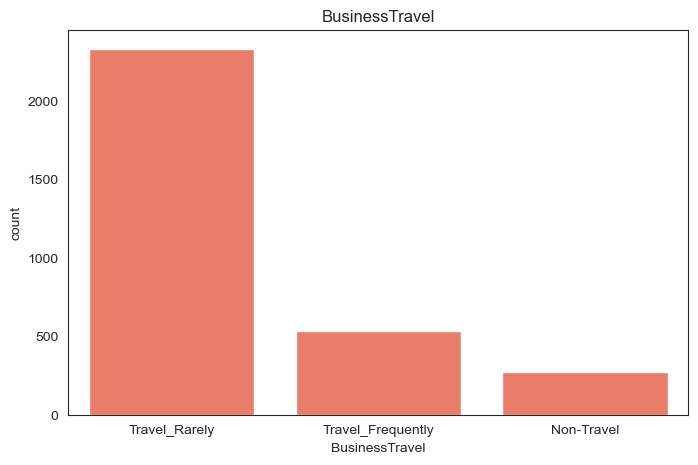

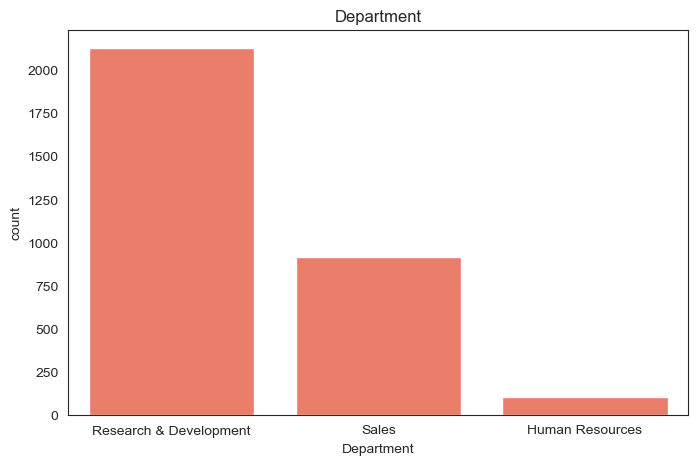

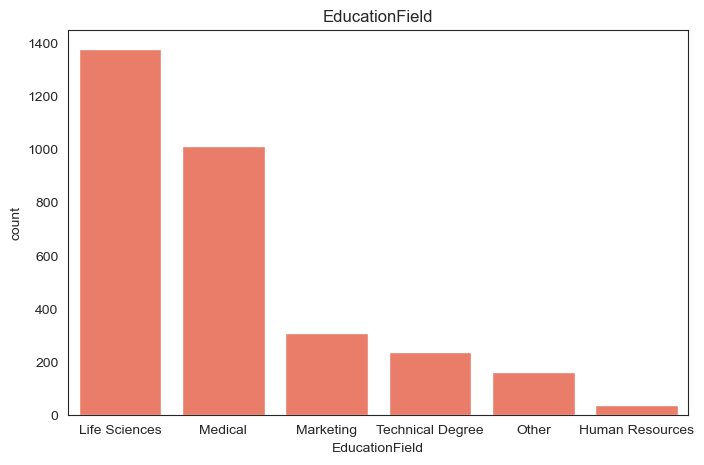

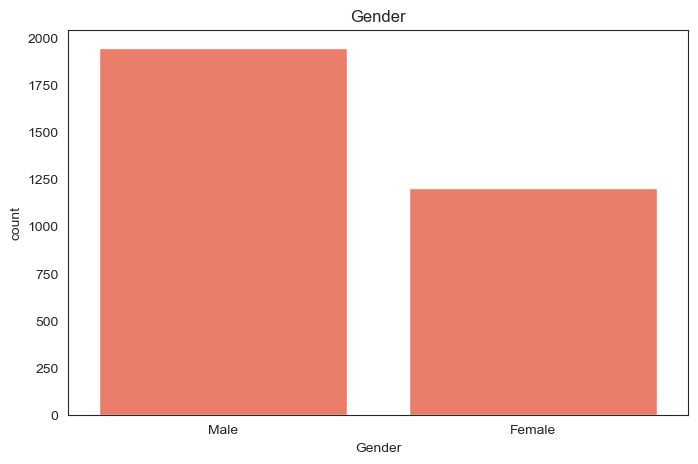

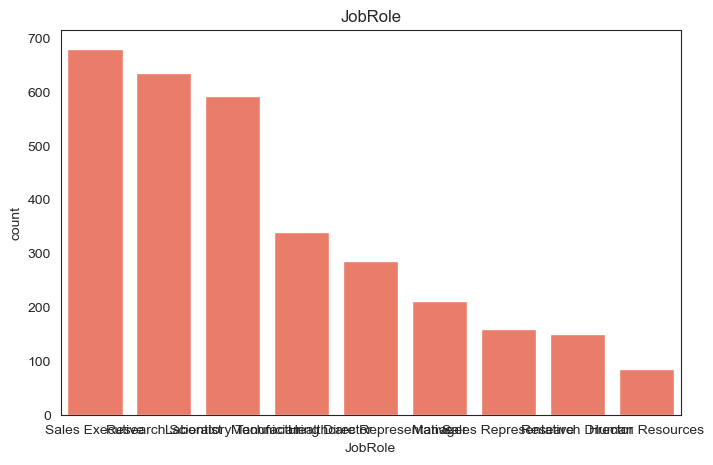

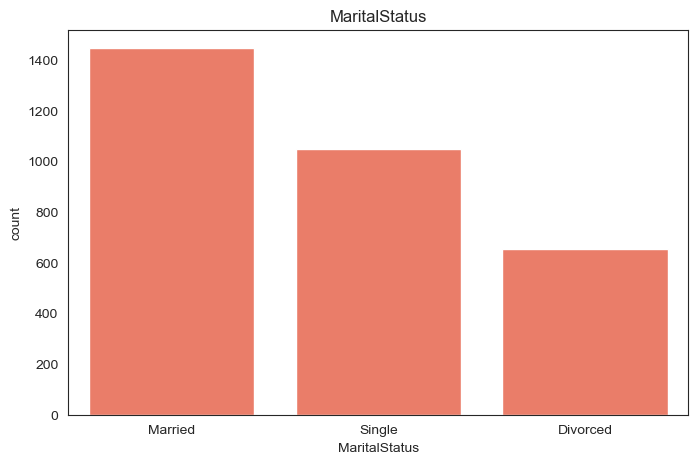

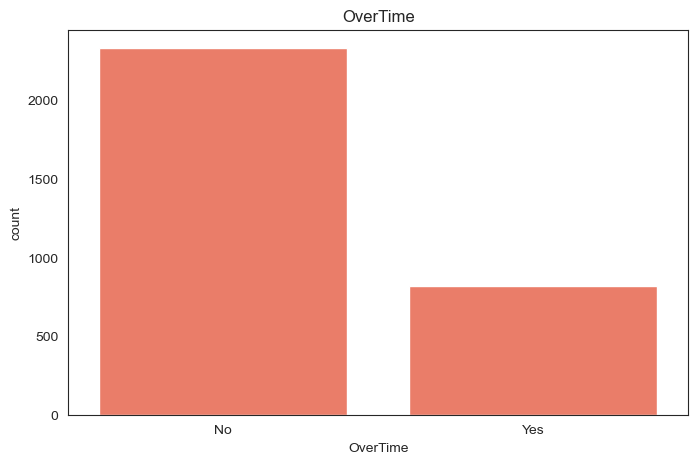

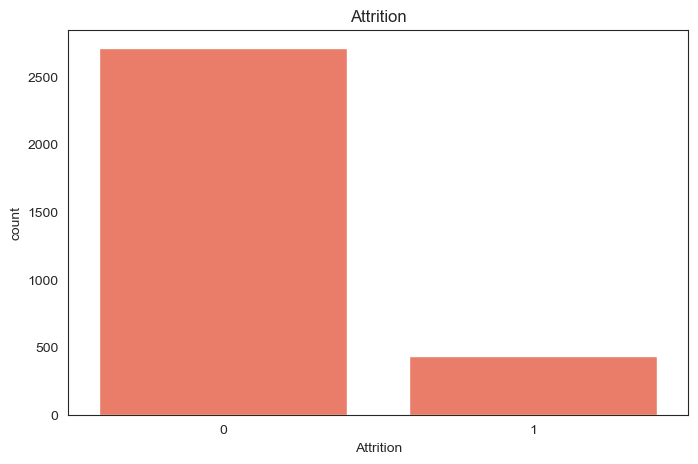

In [114]:
review = train[cat_col]
for i in review.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set_title(i)
    plt.show()

In [115]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(train[i])
#     plt.show();

In [116]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(y=train[i])
#     plt.xlabel(i)
#     plt.show();

## Feature Engineering

Explanation of the columns in the dataset:

1. **id:** Unique identifier for each employee.

2. **Age:** The age of the employee.

3. **BusinessTravel:** The frequency of business travel. This could be "Non-Travel," "Travel_Rarely," or "Travel_Frequently."

4. **DailyRate:** The daily rate of pay for the employee.

5. **Department:** The department in which the employee works ('Research & Development', 'Sales', 'Human Resources').

6. **DistanceFromHome:** The distance of the employee's home from the workplace.

7. **Education:** The level of education achieved by the employee.

8. **EducationField:** The field of education of the employee ('Medical', 'Other', 'Marketing', 'Life Sciences', 'Technical Degree', 'Human Resources').

9. **EmployeeCount:** The count of employees. This column seems to have a constant value and may be dropped as it doesn't provide useful information.

10. **EnvironmentSatisfaction:** Employee's satisfaction with their work environment.

11. **Gender:** The gender of the employee.

12. **HourlyRate:** The hourly rate of pay for the employee.

13. **JobInvolvement:** The level of job involvement.

14. **JobLevel:** The level of the employee's job within the company hierarchy.

15. **JobRole:** The role/title of the employee ('Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director').

16. **JobSatisfaction:** Employee's satisfaction with their job.

17. **MaritalStatus:** The marital status of the employee ('Married', 'Divorced', 'Single').

18. **MonthlyIncome:** The monthly income of the employee.

19. **MonthlyRate:** The monthly rate of pay for the employee.

20. **NumCompaniesWorked:** The number of companies the employee has worked for.

21. **Over18:** Indicates if the employee is over 18 years old. This column may be dropped if all values are the same.

22. **OverTime:** Whether the employee works overtime or not.

23. **PercentSalaryHike:** The percentage increase in salary.

24. **PerformanceRating:** The performance rating of the employee.

25. **RelationshipSatisfaction:** Employee's satisfaction with their relationships at work.

26. **StandardHours:** The standard number of working hours.

27. **StockOptionLevel:** The level of stock options granted to the employee.

28. **TotalWorkingYears:** The total number of years the employee has been working.

29. **TrainingTimesLastYear:** The number of training times the employee attended last year.

30. **WorkLifeBalance:** Employee's perception of work-life balance.

31. **YearsAtCompany:** The number of years the employee has spent at the current company.

32. **YearsInCurrentRole:** The number of years the employee has been in the current role.

33. **YearsSinceLastPromotion:** The number of years since the last promotion.

34. **YearsWithCurrManager:** The number of years the employee has been with the current manager.

35. **Attrition:** The target variable indicating whether the employee has attrited (left the company) or not "Yes" or "No."

In [117]:
train.select_dtypes(include=['int64', 'float']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [118]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print('-' * 50)

print();print();print()
for i in train.select_dtypes(include='number').columns:
    print(train[i].value_counts())
    print('-' * 50)

BusinessTravel
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: count, dtype: int64
--------------------------------------------------
Department
Research & Development    2128
Sales                      917
Human Resources            102
Name: count, dtype: int64
--------------------------------------------------
EducationField
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      1946
Female    1201
Name: count, dtype: int64
--------------------------------------------------
JobRole
Sales Executive              681
Research Scientist           636
Laboratory Technician        593
Manufacturing Director       341
Healthcare Representative    286
Manager                      213
Sales Representative         160
Research Director            151
Human Resources      

In [119]:
# Processing 'train' data
train_df = train.copy()

train_df['IncomePerAge'] = train_df['MonthlyIncome'] / train_df['Age']
train_df["AgeRisk"] = (train_df["Age"] < 34).astype(int)
train_df["HourlyRateRisk"] = (train_df["HourlyRate"] < 60).astype(int)
train_df["DistanceRisk"] = (train_df["DistanceFromHome"] >= 20).astype(int)
train_df["ShortCompanyTenure"] = (train_df["YearsAtCompany"] < 4).astype(int)
train_df['NumCompaniesAdjusted'] = train_df['NumCompaniesWorked'].replace(0, 1)
train_df['AverageCompanyTenure'] = train_df["TotalWorkingYears"] / train_df["NumCompaniesAdjusted"]
train_df['JobHopperIndicator'] = ((train_df["NumCompaniesAdjusted"] > 2) & (train_df["AverageCompanyTenure"] < 2.0)).astype(int)
train_df["AttritionRiskScore"] = train_df["AgeRisk"] + train_df["HourlyRateRisk"] + train_df["DistanceRisk"] + train_df["ShortCompanyTenure"] + train_df['JobHopperIndicator']
train_df['IncomeToDailyRateRatio'] = train_df['MonthlyIncome'] / train_df['DailyRate']
train_df['TenureToAgeRatio'] = train_df['TotalWorkingYears'] / train_df['Age']
train_df['TotalSatisfaction'] = train_df['EnvironmentSatisfaction'] + train_df['JobSatisfaction'] + train_df['RelationshipSatisfaction']

train_df.loc[train_df['Education'] == 15, 'Education'] = 5  
train_df.loc[train_df['JobLevel'] == 7, 'JobLevel'] = 5  

In [120]:
# Processing 'test' data
test_df = test.copy()

test_df['IncomePerAge'] = test_df['MonthlyIncome'] / test_df['Age']
test_df["AgeRisk"] = (test_df["Age"] < 34).astype(int)
test_df["HourlyRateRisk"] = (test_df["HourlyRate"] < 60).astype(int)
test_df["DistanceRisk"] = (test_df["DistanceFromHome"] >= 20).astype(int)
test_df["ShortCompanyTenure"] = (test_df["YearsAtCompany"] < 4).astype(int)
test_df['NumCompaniesAdjusted'] = test_df['NumCompaniesWorked'].replace(0, 1)
test_df['AverageCompanyTenure'] = test_df["TotalWorkingYears"] / test_df["NumCompaniesAdjusted"]
test_df['JobHopperIndicator'] = ((test_df["NumCompaniesAdjusted"] > 2) & (test_df["AverageCompanyTenure"] < 2.0)).astype(int)
test_df["AttritionRiskScore"] = test_df["AgeRisk"] + test_df["HourlyRateRisk"] + test_df["DistanceRisk"] + test_df["ShortCompanyTenure"] + test_df['JobHopperIndicator']
test_df['IncomeToDailyRateRatio'] = test_df['MonthlyIncome'] / test_df['DailyRate']
test_df['TenureToAgeRatio'] = test_df['TotalWorkingYears'] / test_df['Age']
test_df['TotalSatisfaction'] = test_df['EnvironmentSatisfaction'] + test_df['JobSatisfaction'] + test_df['RelationshipSatisfaction']

test_df.loc[test_df['Education'] == 15, 'Education'] = 5  
test_df.loc[test_df['JobLevel'] == 7, 'JobLevel'] = 5  

In [121]:
train_df.shape, test_df.shape

((3147, 43), (1119, 42))

In [122]:
cat_col = train_df.select_dtypes('O').columns.to_list() + ['Attrition']
cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [24]:
test_cat_col = cat_col[:-1]
test_cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [127]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.compose import ColumnTransformer
# import category_encoders as ce

# X = train_df.drop(['Attrition'], axis=1)
# y = train_df['Attrition']

# # Converting categorical variables to numeric data
# cat_pipeline = Pipeline(
#     steps=[
#         ('target encoding', ce.TargetEncoder())
#     ]
# )

# # Scaling numerical features and filling missing values
# num_pipeline = Pipeline(
#     steps=[
#           ('scale', StandardScaler())]
# )

# # Numerical and categorical feature names
# cat_cols = X.select_dtypes(exclude=np.number).columns
# num_cols = X.select_dtypes(include=np.number).columns
# print('Categorical columns:\n', cat_cols);print()
# print('Numeric columns:\n',num_cols)

# # Combining the two pipelines with a column transformer
# from sklearn.compose import ColumnTransformer
# full_pipeline = ColumnTransformer(
#     transformers=[
#         ('numeric', num_pipeline, num_cols),
#         ('categorical', cat_pipeline, cat_cols)
#     ]
# )

# # Fitting the pipeline
# X_ = full_pipeline.fit_transform(X, y)

# # Create DataFrames with correct column names
# X_transformed = pd.DataFrame(X_, columns=X.columns)
# X_transformed.info()

In [128]:
# # fit pipeline to test dataset
# test_df_ = full_pipeline.transform(test_df)
# test_df_transformed = pd.DataFrame(test_df_, columns=test_df.columns)
# test_df_transformed.head()

In [123]:
from sklearn.preprocessing import TargetEncoder

lb =TargetEncoder(smooth="auto")
lb.fit(train_df[cat_col].drop('Attrition', axis=1), train_df[cat_col]['Attrition'])

TargetEncoder()

In [124]:
te_train = pd.DataFrame(lb.transform(train_df[cat_col].drop('Attrition', axis=1)), columns=cat_col[:-1])
te_test = pd.DataFrame(lb.transform(test_df[test_cat_col]), columns=test_cat_col)

In [125]:
display(te_train.head(), te_test.head())

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.222822,0.121718,0.124396,0.147991,0.207261,0.106518,0.263233
1,0.128594,0.173346,0.103825,0.147991,0.365987,0.106518,0.095252
2,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.095252
3,0.128594,0.121718,0.124396,0.124074,0.066565,0.106518,0.095252
4,0.128594,0.121718,0.124396,0.124074,0.065904,0.223379,0.263233


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.061729,0.121718,0.124396,0.147991,0.207261,0.223379,0.095252
1,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.263233
2,0.128594,0.121718,0.128175,0.147991,0.139935,0.074980,0.263233
3,0.128594,0.121718,0.128175,0.147991,0.066565,0.223379,0.095252
4,0.222822,0.121718,0.128175,0.147991,0.207261,0.223379,0.095252


In [126]:
train_df = train_df.select_dtypes(exclude='object')
test_df = test_df.select_dtypes(exclude='object')

train_df = pd.concat([train_df, te_train], axis=1)
test_df = pd.concat([test_df, te_test], axis=1)

display(train_df.head(), test_df.head())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,IncomePerAge,AgeRisk,HourlyRateRisk,DistanceRisk,ShortCompanyTenure,NumCompaniesAdjusted,AverageCompanyTenure,JobHopperIndicator,AttritionRiskScore,IncomeToDailyRateRatio,TenureToAgeRatio,TotalSatisfaction,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,36,599,24,3,4,42,3,1,4,2596,5099,1,13,3,2,1,10,2,3,10,0,7,8,0,72.111111,0,1,1,0,1,10.0,0,2,4.333890,0.277778,10,0.222822,0.121718,0.124396,0.147991,0.207261,0.106518,0.263233
1,35,921,8,3,1,46,3,1,1,2899,10778,1,17,3,4,1,4,3,3,4,2,0,3,0,82.828571,0,1,0,0,1,4.0,0,1,3.147666,0.114286,6,0.128594,0.173346,0.103825,0.147991,0.365987,0.106518,0.095252
2,32,718,26,3,3,80,3,2,4,4627,16495,0,17,3,4,2,4,3,3,3,2,1,2,0,144.593750,1,0,1,1,1,4.0,0,3,6.444290,0.125000,11,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.095252
3,38,1488,2,3,3,40,3,2,1,5347,13384,3,14,3,3,0,15,1,1,6,0,0,2,0,140.710526,0,1,0,0,3,5.0,0,1,3.593414,0.394737,7,0.128594,0.121718,0.124396,0.124074,0.066565,0.106518,0.095252
4,50,1017,5,4,2,37,3,5,1,19033,19805,1,13,3,3,0,31,0,3,31,14,4,10,1,380.660000,0,1,0,0,1,31.0,0,1,18.714848,0.620000,6,0.128594,0.121718,0.124396,0.124074,0.065904,0.223379,0.263233


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerAge,AgeRisk,HourlyRateRisk,DistanceRisk,ShortCompanyTenure,NumCompaniesAdjusted,AverageCompanyTenure,JobHopperIndicator,AttritionRiskScore,IncomeToDailyRateRatio,TenureToAgeRatio,TotalSatisfaction,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,19,992,1,1,4,43,3,1,3,2318,17778,1,12,3,4,0,1,2,2,1,0,0,0,122.000000,1,1,0,1,1,1.000000,0,3,2.336694,0.052632,11,0.061729,0.121718,0.124396,0.147991,0.207261,0.223379,0.095252
1,45,1136,4,4,3,67,3,2,1,5486,12421,6,12,3,3,1,7,3,3,2,2,2,2,121.911111,0,0,0,1,6,1.166667,1,2,4.829225,0.155556,7,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.263233
2,37,155,13,3,4,41,3,1,4,2741,23577,4,13,3,2,2,13,2,2,7,7,1,7,74.081081,0,1,0,0,4,3.250000,0,1,17.683871,0.351351,10,0.128594,0.121718,0.128175,0.147991,0.139935,0.074980,0.263233
3,32,688,1,4,3,89,2,2,3,5228,20364,1,13,3,3,0,14,2,2,14,10,11,8,163.375000,1,0,0,0,1,14.000000,0,1,7.598837,0.437500,9,0.128594,0.121718,0.128175,0.147991,0.066565,0.223379,0.095252
4,29,464,9,1,3,79,3,1,4,1223,15178,1,14,3,1,0,1,5,3,1,0,0,0,42.172414,1,0,0,1,1,1.000000,0,2,2.635776,0.034483,8,0.222822,0.121718,0.128175,0.147991,0.207261,0.223379,0.095252


## Model Training

## XGBoost

In [129]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score,
                            precision_score, classification_report, roc_auc_score, confusion_matrix, auc)
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, rand
import random
import sys
from tqdm import tqdm
import shap

import warnings
warnings.filterwarnings(action='ignore')

In [131]:
X = train_df.drop(['Attrition'], axis=1)
y = train_df['Attrition']

X.shape, test_df.shape

((3147, 42), (1119, 42))

### Getting the Optimal Values of K for Cross Validation

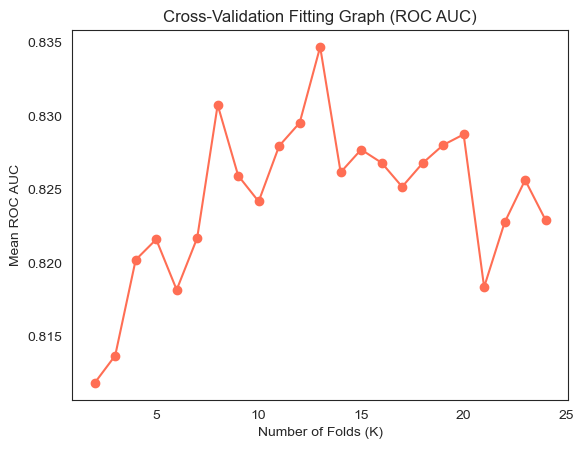

Best K value based on ROC AUC: 13


In [134]:
# Set up K values and performance tracking
k_values = np.arange(2, 25)
performance_scores = []

skf_seed = 2024
model = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', random_state=skf_seed)
performance_scores = [
    np.mean(cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=k, shuffle=True, random_state=skf_seed), scoring='roc_auc'))
    for k in k_values
]

# Find the best K value and score
best_k = k_values[np.argmax(performance_scores)]
best_score = performance_scores[np.argmax(performance_scores)]

# Visualize results
plt.plot(k_values, performance_scores, marker='o')
plt.title('Cross-Validation Fitting Graph (ROC AUC)')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean ROC AUC')
plt.show()

print("Best K value based on ROC AUC:", best_k)

In [136]:
print(k_values)
print('\n', performance_scores)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]

 [0.8118409513867666, 0.8136986544021009, 0.8202081060158799, 0.8216004522897894, 0.8181714462182863, 0.8216952850005442, 0.8307434563646272, 0.8259342880955599, 0.8241767629092781, 0.82795443669592, 0.8295238379972892, 0.8346846557175314, 0.8261609792115953, 0.827706566094894, 0.8268061045917381, 0.8251767480577136, 0.8267825974981605, 0.8280139945785997, 0.8287365425968367, 0.8183566986723133, 0.8227490206006395, 0.8256344619839946, 0.8229105634969921]


In [72]:
# # Custom objective function for weighted logistic loss
# def weighted_logistic_loss(y_pred, y_true, weights):
#     # Calculate weighted logistic loss
#     return -np.mean(weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

# # Classifier objective class
# class ClassifierObjective:
#     def __init__(self, dtrain, const_params, fold_count, have_gpu):
#         self._dtrain = dtrain
#         self._const_params = const_params.copy()
#         self._fold_count = fold_count
#         self._have_gpu = have_gpu
#         self._evaluated_count = 0

#     def _to_xgb_params(self, hyper_params, class_weights=None):
#         params = {
#             'n_estimators': int(hyper_params['n_estimators']),
#             'max_depth': int(hyper_params['max_depth']),
#             'learning_rate': hyper_params['learning_rate'],
#             'subsample': hyper_params['subsample'],
#             'colsample_bytree': hyper_params['colsample_bytree'],
#             'gamma': int(hyper_params['gamma']),
#             'min_child_weight': int(hyper_params['min_child_weight']),
#             'reg_lambda': hyper_params['reg_lambda'],
#             'reg_alpha': hyper_params['reg_alpha'],
#             'objective': weighted_logistic_loss,
#             'eval_metric': ['logloss', 'auc'],
#             'tree_method': 'gpu_hist' if self._have_gpu else 'auto',
#             'seed': skf_seed,
#         }

#         if class_weights:
#             params['sample_weight'] = np.array([class_weights[i] for i in self._dtrain.get_label()])  # Set weights
            
#         return params

#     def __call__(self, hyper_params):
#         params = self._to_xgb_params(hyper_params)
#         params.update(self._const_params)
#         params['tree_method'] = 'gpu_hist' if self._have_gpu else 'hist'  # Enable GPU acceleration if available
#         params['sample_weight'] = params.pop('sample_weight', None)

#         print(f'Evaluating params={params}', file=sys.stdout)
#         mean_aucs = []

#         # Use a progress bar for feedback
#         with tqdm(total=self._fold_count) as pbar:
#             for _ in range(self._fold_count):
#                 cv_result = xgb.cv(
#                     params=params,
#                     dtrain=self._dtrain,
#                     nfold=self._fold_count,
#                     seed=skf_seed,
#                     metrics='auc',
#                     maximize=True,
#                     stratified=True
#                 )
#                 mean_aucs.append(cv_result['test-auc-mean'].max())
#                 pbar.update()

#         max_mean_auc = np.mean(mean_aucs)
#         print(f'Evaluated mean score={max_mean_auc}', file=sys.stdout)

#         self._evaluated_count += 1
#         print(f'Evaluated {self._evaluated_count} times', file=sys.stdout)

#         return {'loss': -max_mean_auc, 'status': STATUS_OK}

In [73]:
# def find_best_hyper_params(dtrain, const_params, max_evals=100, have_gpu=False, num_folds=best_k):
#     parameter_space = {
#         'n_estimators': hp.quniform('n_estimators', 100, 2500, 50),  # Number of boosting rounds
#         'max_depth': hp.choice('max_depth', [3,5,7,9,11,13,15,17,20]),  # Maximum depth of a tree, controls the complexity of the model
#         'learning_rate': hp.loguniform('learning_rate', 0.001, 0.3),  # Step size shrinkage used in each boosting update, controls learning rate
#         'subsample': hp.uniform('subsample', 0.4, 1.0), # Fraction of samples used for fitting the trees, controls feature randomness
#         'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),  # Fraction of features used for fitting the trees, controls tree randomness
#         'gamma': hp.quniform('gamma', 0, 20, 1),   # Minimum loss reduction required to make a further partition on a leaf node
#         'min_child_weight': hp.quniform('min_child_weight', 1, 300, 1),   # Minimum sum of instance weight (hessian) needed in a child
#         'reg_lambda': hp.loguniform('reg_lambda', 1e-3, 10.0),  # L2 regularization term on weights
#         'reg_alpha': hp.loguniform('reg_alpha', 1e-3, 10.0),  # L1 regularization term on weights
#     }

#     np.random.seed(seed=skf_seed)

#     objective = ClassifierObjective(dtrain=dtrain, const_params=const_params, fold_count=num_folds, have_gpu=have_gpu)
#     trials = Trials()
#     best = fmin(
#         fn=objective,
#         space=parameter_space,
#         algo=tpe.suggest,
#         max_evals=max_evals,
#         rstate=np.random.seed(seed=skf_seed)
#     )

#     return best

In [74]:
# def train_best_model(X, y, const_params, max_evals=100, use_default=False):
#     # Create DMatrix for training and validation
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=skf_seed)
#     dtrain = xgb.DMatrix(X_train, label=y_train)
#     dval = xgb.DMatrix(X_test, label=y_test)

#     if use_default:
#         # Use default hyperparameters
#         hyper_params = const_params
#     else:
#         # Find best hyperparameters
#         best = find_best_hyper_params(dtrain, const_params, max_evals=max_evals)
#         hyper_params = best.copy()
#         hyper_params.update(const_params)
        
#         hyper_params['n_estimators'] = int(hyper_params['n_estimators'])
#         hyper_params['max_depth'] = int(hyper_params['max_depth'])
#         hyper_params['min_child_weight'] = int(hyper_params['min_child_weight'])
#         hyper_params['gamma'] = int(hyper_params['gamma'])

#         # Calculate class weights
#         class_weights = {0: len(y_train) / np.sum(y_train == 0), 1: 1.0}

#         # Print the best hyperparameters
#         print("Best Hyperparameters:", hyper_params)

#     # Train the model
#     model = xgb.train(hyper_params, dtrain, evals=[(dval, 'validation')])

#     return model, hyper_params

### Creating the Objective Function so that we can use it in the hyperparameter optimization using scale_pos_weight

In [139]:
class ClassifierObjective(object):
    def __init__(self, dtrain, const_params, fold_count, have_gpu):
        self._dtrain = dtrain
        self._const_params = const_params.copy()
        self._fold_count = fold_count
        self._have_gpu = have_gpu
        self._evaluated_count = 0

    def _to_xgb_params(self, hyper_params):
        return {
            'n_estimators': int(hyper_params['n_estimators']),
            'max_depth': int(hyper_params['max_depth']),
            'learning_rate': hyper_params['learning_rate'],
            'subsample': hyper_params['subsample'],
            'colsample_bytree': hyper_params['colsample_bytree'],
            'gamma': int(hyper_params['gamma']),
            'min_child_weight': int(hyper_params['min_child_weight']),
            'reg_lambda': hyper_params['reg_lambda'],
            'reg_alpha': hyper_params['reg_alpha'],
            'scale_pos_weight': hyper_params['scale_pos_weight'],
            'objective': 'binary:logistic',
            'eval_metric': ['logloss', 'auc'],
            'tree_method': 'gpu_hist' if self._have_gpu else 'hist',
            'seed': skf_seed,
        }

    def __call__(self, hyper_params):
        params = self._to_xgb_params(hyper_params)
        params.update(self._const_params)
        params['tree_method'] = 'gpu_hist' if self._have_gpu else 'hist'

        print(f'Evaluating params={params}', file=sys.stdout)
        mean_aucs = []

        # Use a progress bar for feedback
        with tqdm(total=self._fold_count) as pbar:
            for _ in range(self._fold_count):
                cv_result = xgb.cv(
                    params=params,
                    dtrain=self._dtrain,
                    nfold=self._fold_count,
                    seed=skf_seed,
                    metrics='auc',
                    maximize=True,
                    stratified=True
                )
                mean_aucs.append(cv_result['test-auc-mean'].max())
                pbar.update()

        max_mean_auc = np.mean(mean_aucs)
        print(f'Evaluated mean score={max_mean_auc}', file=sys.stdout)

        self._evaluated_count += 1
        print(f'Evaluated {self._evaluated_count} times', file=sys.stdout)

        return {'loss': -max_mean_auc, 'status': STATUS_OK}

In [140]:
def find_best_hyper_params(dtrain, const_params, max_evals=100, have_gpu=False, num_folds=best_k):
    parameter_space = {
        'n_estimators': hp.quniform('n_estimators', 100, 2500, 50),  # Number of boosting rounds
        'max_depth': hp.choice('max_depth', [3,5,7,9,11,13,15,17,20]),  # Maximum depth of a tree, controls the complexity of the model
        'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.1)), # Step size shrinkage used in each boosting update, controls learning rate
        'subsample': hp.uniform('subsample', 0.4, 1.0), # Fraction of samples used for fitting the trees, controls feature randomness
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),  # Fraction of features used for fitting the trees, controls tree randomness
        'gamma': hp.quniform('gamma', 0, 20, 1),   # Minimum loss reduction required to make a further partition on a leaf node
        'min_child_weight': hp.quniform('min_child_weight', 1, 300, 1),   # Minimum sum of instance weight (hessian) needed in a child
        'reg_lambda': hp.loguniform('reg_lambda', np.log(1e-3), np.log(10.0)),  # L2 regularization term on weights
        'reg_alpha': hp.loguniform('reg_alpha', np.log(1e-3), np.log(10.0)),  # L1 regularization term on weights
        'scale_pos_weight': hp.uniform('scale_pos_weight', 6.2, 15),  # Controls the balance of positive and negative weights, useful for imbalanced classes
    }

    np.random.seed(seed=skf_seed)

    objective = ClassifierObjective(dtrain=dtrain, const_params=const_params, fold_count=num_folds, have_gpu=have_gpu)
    trials = Trials()
    best = fmin(
        fn=objective,
        space=parameter_space,
        algo=tpe.suggest,
        max_evals=max_evals,
        rstate=np.random.seed(seed=skf_seed)
    )

    return best

In [141]:
def train_best_model(X, y, const_params, max_evals=100, use_default=False):
    # Create DMatrix for training and validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=skf_seed)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_test, label=y_test)

    if use_default:
        # Use default hyperparameters
        hyper_params = const_params
    else:
        # Find best hyperparameters
        best = find_best_hyper_params(dtrain, const_params, max_evals=max_evals)
        hyper_params = best.copy()
        hyper_params.update(const_params)
        
        hyper_params['n_estimators'] = int(hyper_params['n_estimators'])
        hyper_params['max_depth'] = int(hyper_params['max_depth'])
        hyper_params['min_child_weight'] = int(hyper_params['min_child_weight'])
        hyper_params['gamma'] = int(hyper_params['gamma'])

        # Print the best hyperparameters
        print("\n\nThe Best Hyperparameters:", hyper_params)

    # Train the model
    model = xgb.train(hyper_params, dtrain, evals=[(dval, 'validation')])

    return model, hyper_params

In [143]:
# Set GPU usage and hyperparameter optimization iterations
have_gpu = False
hyperopt_iterations = 100

# Define constant parameters
const_params = {
    'tree_method': 'gpu_hist' if have_gpu else 'hist', 
    'objective': 'binary:logistic',
    'eval_metric': ['logloss', 'auc'],
    'seed': skf_seed,
}

# Train the best model (using only the training set)
model, params = train_best_model(X, y, const_params, max_evals=hyperopt_iterations)

Evaluating params={'n_estimators': 1550, 'max_depth': 20, 'learning_rate': 0.03383673720584182, 'subsample': 0.44450664226075914, 'colsample_bytree': 0.6523936620178667, 'gamma': 16, 'min_child_weight': 14, 'reg_lambda': 3.344965055012449, 'reg_alpha': 0.00436117728486447, 'scale_pos_weight': 13.089785200832354, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  0%|                                                                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.04s/it]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.03it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.04it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.03it/s]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.796521638894123                                                                                                                                 
Evaluated 1 times                                                                                                                                                      
Evaluating params={'n_estimators': 2050, 'max_depth': 15, 'learning_rate': 0.06819747246396299, 'subsample': 0.7789449187057953, 'colsample_bytree': 0.7499763298849481, 'gamma': 18, 'min_child_weight': 3, 'reg_lambda': 0.21623493699049715, 'reg_alpha': 3.867800090167623, 'scale_pos_weight': 14.023928081725963, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  1%|▉                                                                                               | 1/100 [00:12<21:19, 12.93s/trial, best loss: -0.796521638894123]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:15,  1.26s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:13,  1.25s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:12,  1.29s/it]

 31%|########################################3                                                                                          | 4/13 [00:05<00:11,  1.32s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:10

Evaluated mean score=0.8048611905747033                                                                                                                                
Evaluated 2 times                                                                                                                                                      
Evaluating params={'n_estimators': 1950, 'max_depth': 9, 'learning_rate': 0.03570935202469822, 'subsample': 0.7010481256418358, 'colsample_bytree': 0.4021898465432365, 'gamma': 15, 'min_child_weight': 126, 'reg_lambda': 0.0029675718261655097, 'reg_alpha': 0.44332140909012846, 'scale_pos_weight': 14.45470320736852, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  2%|█▉                                                                                             | 2/100 [00:29<24:46, 15.17s/trial, best loss: -0.8048611905747033]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.39it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.39it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.32it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.33it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7918126594538831                                                                                                                                
Evaluated 3 times                                                                                                                                                      
Evaluating params={'n_estimators': 2200, 'max_depth': 20, 'learning_rate': 0.06744988273395938, 'subsample': 0.755036488757328, 'colsample_bytree': 0.8375532058423056, 'gamma': 11, 'min_child_weight': 22, 'reg_lambda': 0.9200450929391298, 'reg_alpha': 4.5806538901439895, 'scale_pos_weight': 6.308285141388202, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  3%|██▊                                                                                            | 3/100 [00:39<20:37, 12.76s/trial, best loss: -0.8048611905747033]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.09it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.08it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.08it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.09it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8068112693365203                                                                                                                                
Evaluated 4 times                                                                                                                                                      
Evaluating params={'n_estimators': 2200, 'max_depth': 7, 'learning_rate': 0.023321265685087654, 'subsample': 0.5630805183049503, 'colsample_bytree': 0.8562977633395596, 'gamma': 16, 'min_child_weight': 81, 'reg_lambda': 0.9973360671937406, 'reg_alpha': 0.004440346572299411, 'scale_pos_weight': 10.777311454019756, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  4%|███▊                                                                                           | 4/100 [00:52<20:13, 12.64s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:18,  1.58s/it]

 15%|####################1                                                                                                              | 2/13 [00:04<00:22,  2.09s/it]

 23%|##############################2                                                                                                    | 3/13 [00:05<00:18,  1.81s/it]

 31%|########################################3                                                                                          | 4/13 [00:06<00:12,  1.44s/it]

 38%|##################################################3                                                                                | 5/13 [00:07<00:10

Evaluated mean score=0.7986400006230826                                                                                                                                
Evaluated 5 times                                                                                                                                                      
Evaluating params={'n_estimators': 1550, 'max_depth': 9, 'learning_rate': 0.001740779335914114, 'subsample': 0.6964820660795827, 'colsample_bytree': 0.9638493730499922, 'gamma': 9, 'min_child_weight': 219, 'reg_lambda': 0.03752483767980366, 'reg_alpha': 4.898408851708788, 'scale_pos_weight': 11.445087612646478, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  5%|████▊                                                                                          | 5/100 [01:12<24:16, 15.33s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.01it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.29it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.40it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.30it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7506120678601019                                                                                                                                
Evaluated 6 times                                                                                                                                                      
Evaluating params={'n_estimators': 2100, 'max_depth': 15, 'learning_rate': 0.014456784179006517, 'subsample': 0.8275285719041343, 'colsample_bytree': 0.3635507815964977, 'gamma': 16, 'min_child_weight': 130, 'reg_lambda': 2.7015883932418214, 'reg_alpha': 0.21762421097508133, 'scale_pos_weight': 9.139257108774602, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  6%|█████▋                                                                                         | 6/100 [01:22<21:11, 13.53s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.31it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.31it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.34it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.35it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7898506501421155                                                                                                                                
Evaluated 7 times                                                                                                                                                      
Evaluating params={'n_estimators': 900, 'max_depth': 15, 'learning_rate': 0.07706474511780398, 'subsample': 0.8287512949021045, 'colsample_bytree': 0.4127598850069062, 'gamma': 19, 'min_child_weight': 271, 'reg_lambda': 5.161154551214211, 'reg_alpha': 0.013172283212228556, 'scale_pos_weight': 13.089226724391718, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  7%|██████▋                                                                                        | 7/100 [01:31<18:59, 12.25s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.52it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.51it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.50it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.49it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7761105802282485                                                                                                                                
Evaluated 8 times                                                                                                                                                      
Evaluating params={'n_estimators': 950, 'max_depth': 13, 'learning_rate': 0.004315962532975833, 'subsample': 0.9506403142561688, 'colsample_bytree': 0.39062027762137186, 'gamma': 16, 'min_child_weight': 217, 'reg_lambda': 0.0030649345724159194, 'reg_alpha': 0.10118906203924335, 'scale_pos_weight': 12.153759478839259, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  8%|███████▌                                                                                       | 8/100 [01:40<17:06, 11.16s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.43it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.42it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.43it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.44it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7686027664429295                                                                                                                                
Evaluated 9 times                                                                                                                                                      
Evaluating params={'n_estimators': 1900, 'max_depth': 5, 'learning_rate': 0.006526640119035726, 'subsample': 0.9922119033346395, 'colsample_bytree': 0.32813771779114453, 'gamma': 1, 'min_child_weight': 174, 'reg_lambda': 2.42945658641441, 'reg_alpha': 0.005419956773828383, 'scale_pos_weight': 8.198251368403524, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
  9%|████████▌                                                                                      | 9/100 [01:49<15:57, 10.52s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.47it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.45it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.42it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.39it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7784312639707274                                                                                                                                
Evaluated 10 times                                                                                                                                                     
Evaluating params={'n_estimators': 1100, 'max_depth': 15, 'learning_rate': 0.0993409111466867, 'subsample': 0.6793277604864083, 'colsample_bytree': 0.5452451883586668, 'gamma': 17, 'min_child_weight': 111, 'reg_lambda': 0.022119667800381843, 'reg_alpha': 0.038285153113778864, 'scale_pos_weight': 7.518798712775158, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 10%|█████████▍                                                                                    | 10/100 [01:59<15:15, 10.17s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.26it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.27it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.27it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.29it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.797847680706962                                                                                                                                 
Evaluated 11 times                                                                                                                                                     
Evaluating params={'n_estimators': 1350, 'max_depth': 20, 'learning_rate': 0.0037091465062101692, 'subsample': 0.9046433370310112, 'colsample_bytree': 0.5469733011134178, 'gamma': 4, 'min_child_weight': 215, 'reg_lambda': 2.583343446651192, 'reg_alpha': 0.004981727222700761, 'scale_pos_weight': 8.33043272919435, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 11%|██████████▎                                                                                   | 11/100 [02:09<14:59, 10.11s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.02it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.33it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.38it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.754981009192466                                                                                                                                 
Evaluated 12 times                                                                                                                                                     
Evaluating params={'n_estimators': 1400, 'max_depth': 17, 'learning_rate': 0.0011368346763099356, 'subsample': 0.6908924352577341, 'colsample_bytree': 0.8759994212859552, 'gamma': 1, 'min_child_weight': 240, 'reg_lambda': 2.4658306564793895, 'reg_alpha': 0.00560791981840156, 'scale_pos_weight': 8.659946044340114, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 12%|███████████▎                                                                                  | 12/100 [02:18<14:27,  9.85s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.54it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.55it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.52it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.54it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7526462367202574                                                                                                                                
Evaluated 13 times                                                                                                                                                     
Evaluating params={'n_estimators': 1000, 'max_depth': 15, 'learning_rate': 0.008569996437070336, 'subsample': 0.738261381446071, 'colsample_bytree': 0.348129966439362, 'gamma': 15, 'min_child_weight': 190, 'reg_lambda': 2.731991756260214, 'reg_alpha': 0.0032729256341733253, 'scale_pos_weight': 8.061415309122342, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 13%|████████████▏                                                                                 | 13/100 [02:26<13:40,  9.43s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.48it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.48it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.47it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.46it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.757705136749758                                                                                                                                 
Evaluated 14 times                                                                                                                                                     
Evaluating params={'n_estimators': 2050, 'max_depth': 7, 'learning_rate': 0.0013838903362952796, 'subsample': 0.8831548677805557, 'colsample_bytree': 0.9455734549516683, 'gamma': 6, 'min_child_weight': 150, 'reg_lambda': 0.026211882877709588, 'reg_alpha': 0.2932311401888603, 'scale_pos_weight': 11.694334567496426, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 14%|█████████████▏                                                                                | 14/100 [02:35<13:17,  9.28s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.39it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.36it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.35it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.35it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7631222836114258                                                                                                                                
Evaluated 15 times                                                                                                                                                     
Evaluating params={'n_estimators': 650, 'max_depth': 7, 'learning_rate': 0.002812234335688768, 'subsample': 0.9191394718761865, 'colsample_bytree': 0.48638002647596573, 'gamma': 12, 'min_child_weight': 51, 'reg_lambda': 0.04512821847538428, 'reg_alpha': 0.05012732245747609, 'scale_pos_weight': 11.855089791112636, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 15%|██████████████                                                                                | 15/100 [02:45<13:22,  9.44s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.12it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.12it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.11it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.12it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.7985575254892042                                                                                                                                
Evaluated 16 times                                                                                                                                                     
Evaluating params={'n_estimators': 1600, 'max_depth': 7, 'learning_rate': 0.027517223265717504, 'subsample': 0.8190899988930156, 'colsample_bytree': 0.6494927200500875, 'gamma': 9, 'min_child_weight': 283, 'reg_lambda': 5.432292027382471, 'reg_alpha': 0.0018138947014481434, 'scale_pos_weight': 11.594721065273252, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 16%|███████████████                                                                               | 16/100 [02:57<14:11, 10.13s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.53it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.48it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.47it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.47it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7679781055304106                                                                                                                                
Evaluated 17 times                                                                                                                                                     
Evaluating params={'n_estimators': 2350, 'max_depth': 15, 'learning_rate': 0.005698639614827755, 'subsample': 0.808754219606163, 'colsample_bytree': 0.9470308920020325, 'gamma': 8, 'min_child_weight': 106, 'reg_lambda': 5.63201262313589, 'reg_alpha': 0.12086339127045663, 'scale_pos_weight': 10.747822870140327, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 17%|███████████████▉                                                                              | 17/100 [03:06<13:35,  9.82s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.20it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.16it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.14it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.17it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7742062948848171                                                                                                                                
Evaluated 18 times                                                                                                                                                     
Evaluating params={'n_estimators': 1750, 'max_depth': 20, 'learning_rate': 0.0369809577217705, 'subsample': 0.5308036941988717, 'colsample_bytree': 0.6992495383590898, 'gamma': 17, 'min_child_weight': 156, 'reg_lambda': 0.025002960816824717, 'reg_alpha': 0.19462288594968585, 'scale_pos_weight': 8.788667012049288, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 18%|████████████████▉                                                                             | 18/100 [03:17<13:48, 10.10s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.52it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.50it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.49it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.48it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7781557914079015                                                                                                                                
Evaluated 19 times                                                                                                                                                     
Evaluating params={'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.006218571968806385, 'subsample': 0.8772036726847001, 'colsample_bytree': 0.40719757905826065, 'gamma': 10, 'min_child_weight': 196, 'reg_lambda': 0.1321483117850749, 'reg_alpha': 0.03375510152337533, 'scale_pos_weight': 11.466097260716822, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 19%|█████████████████▊                                                                            | 19/100 [03:26<13:08,  9.73s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.46it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.43it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.42it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.42it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7726005504033785                                                                                                                                
Evaluated 20 times                                                                                                                                                     
Evaluating params={'n_estimators': 2400, 'max_depth': 11, 'learning_rate': 0.05796913453499074, 'subsample': 0.6266595794797019, 'colsample_bytree': 0.7815175022832411, 'gamma': 20, 'min_child_weight': 2, 'reg_lambda': 0.29022158021709843, 'reg_alpha': 9.641600265614704, 'scale_pos_weight': 6.285991668989448, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 20%|██████████████████▊                                                                           | 20/100 [03:35<12:47,  9.59s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.21it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.20it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.19it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8000326028291181                                                                                                                                
Evaluated 21 times                                                                                                                                                     
Evaluating params={'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.05805267277653917, 'subsample': 0.784189109606378, 'colsample_bytree': 0.8090403563568193, 'gamma': 13, 'min_child_weight': 34, 'reg_lambda': 0.5586597810346511, 'reg_alpha': 2.1768440761740115, 'scale_pos_weight': 14.40109362178023, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 21%|███████████████████▋                                                                          | 21/100 [03:46<13:12, 10.04s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.42it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.38it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.38it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.37it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7976054048397316                                                                                                                                
Evaluated 22 times                                                                                                                                                     
Evaluating params={'n_estimators': 2450, 'max_depth': 3, 'learning_rate': 0.015665272627428388, 'subsample': 0.6276487146821883, 'colsample_bytree': 0.763375623334252, 'gamma': 4, 'min_child_weight': 66, 'reg_lambda': 0.14983631742630785, 'reg_alpha': 1.0649903883757197, 'scale_pos_weight': 9.662330152703088, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 22%|████████████████████▋                                                                         | 22/100 [03:56<13:01, 10.02s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.30it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.25it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.21it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.24it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.790560504100292                                                                                                                                 
Evaluated 23 times                                                                                                                                                     
Evaluating params={'n_estimators': 2250, 'max_depth': 13, 'learning_rate': 0.09463080982317124, 'subsample': 0.7513020262149203, 'colsample_bytree': 0.7144328927262154, 'gamma': 13, 'min_child_weight': 25, 'reg_lambda': 0.840806890402932, 'reg_alpha': 9.471237674967735, 'scale_pos_weight': 6.830066006739105, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 23%|█████████████████████▌                                                                        | 23/100 [04:07<13:05, 10.20s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.11it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.10it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.07it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.05it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8025580842522261                                                                                                                                
Evaluated 24 times                                                                                                                                                     
Evaluating params={'n_estimators': 2500, 'max_depth': 11, 'learning_rate': 0.0513564493778694, 'subsample': 0.9998442785668704, 'colsample_bytree': 0.8900410860445195, 'gamma': 19, 'min_child_weight': 44, 'reg_lambda': 0.3174319607700109, 'reg_alpha': 2.7259118365579593, 'scale_pos_weight': 13.590671908797088, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 24%|██████████████████████▌                                                                       | 24/100 [04:19<13:43, 10.83s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:16,  1.39s/it]

 15%|####################1                                                                                                              | 2/13 [00:05<00:31,  2.87s/it]

 23%|##############################2                                                                                                    | 3/13 [00:09<00:35,  3.57s/it]

 31%|########################################3                                                                                          | 4/13 [00:10<00:23,  2.57s/it]

 38%|##################################################3                                                                                | 5/13 [00:13<00:20

Evaluated mean score=0.7907354708180765                                                                                                                                
Evaluated 25 times                                                                                                                                                     
Evaluating params={'n_estimators': 1800, 'max_depth': 20, 'learning_rate': 0.019424665566266878, 'subsample': 0.6228292335395, 'colsample_bytree': 0.622958677825969, 'gamma': 11, 'min_child_weight': 1, 'reg_lambda': 0.011695655835307028, 'reg_alpha': 0.7998237125887667, 'scale_pos_weight': 9.942121293130977, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 25%|███████████████████████▌                                                                      | 25/100 [04:55<22:56, 18.36s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:06<01:20,  6.73s/it]

 15%|####################1                                                                                                              | 2/13 [00:10<00:53,  4.86s/it]

 23%|##############################2                                                                                                    | 3/13 [00:13<00:40,  4.02s/it]

 31%|########################################3                                                                                          | 4/13 [00:18<00:42,  4.67s/it]

 38%|##################################################3                                                                                | 5/13 [00:24<00:39

Evaluated mean score=0.7894728769214739                                                                                                                                
Evaluated 26 times                                                                                                                                                     
Evaluating params={'n_estimators': 1700, 'max_depth': 17, 'learning_rate': 0.012695571085744798, 'subsample': 0.40658290891723353, 'colsample_bytree': 0.8273159261998471, 'gamma': 7, 'min_child_weight': 83, 'reg_lambda': 0.06839124107976705, 'reg_alpha': 4.7487306024296325, 'scale_pos_weight': 14.99578689717074, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 26%|████████████████████████▍                                                                     | 26/100 [05:47<35:22, 28.68s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.12it/s]

 15%|####################1                                                                                                              | 2/13 [00:03<00:20,  1.84s/it]

 23%|##############################2                                                                                                    | 3/13 [00:04<00:13,  1.35s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:10,  1.15s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.7924264028396125                                                                                                                                
Evaluated 27 times                                                                                                                                                     
Evaluating params={'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.09909998303537351, 'subsample': 0.766348626968678, 'colsample_bytree': 0.9986346449773912, 'gamma': 5, 'min_child_weight': 68, 'reg_lambda': 0.001045224097417884, 'reg_alpha': 1.081683662412286, 'scale_pos_weight': 7.113179757345999, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 27%|█████████████████████████▍                                                                    | 27/100 [06:00<29:00, 23.84s/trial, best loss: -0.8068112693365203]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.10it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.07it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.09it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.09it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8110275066032226                                                                                                                                
Evaluated 28 times                                                                                                                                                     
Evaluating params={'n_estimators': 150, 'max_depth': 20, 'learning_rate': 0.043130665470915805, 'subsample': 0.5027737080565675, 'colsample_bytree': 0.9825881369964118, 'gamma': 4, 'min_child_weight': 65, 'reg_lambda': 0.0011920053309905031, 'reg_alpha': 1.299731476382567, 'scale_pos_weight': 6.323126030558355, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 28%|██████████████████████████▎                                                                   | 28/100 [06:12<24:10, 20.14s/trial, best loss: -0.8110275066032226]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.23it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.28it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.29it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7976570726913418                                                                                                                                
Evaluated 29 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 20, 'learning_rate': 0.0968727274944616, 'subsample': 0.5783725251920259, 'colsample_bytree': 0.9059693636385043, 'gamma': 6, 'min_child_weight': 21, 'reg_lambda': 0.006395764670535275, 'reg_alpha': 0.5847194553314623, 'scale_pos_weight': 7.250743395419191, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 29%|███████████████████████████▎                                                                  | 29/100 [06:22<20:22, 17.22s/trial, best loss: -0.8110275066032226]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:14,  1.21s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:13,  1.20s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:11,  1.16s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:10,  1.13s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.8111248816194347                                                                                                                                
Evaluated 30 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 20, 'learning_rate': 0.07909664732954966, 'subsample': 0.46616381976411175, 'colsample_bytree': 0.9969601441050038, 'gamma': 2, 'min_child_weight': 92, 'reg_lambda': 0.0010465856108425474, 'reg_alpha': 0.4454895388162269, 'scale_pos_weight': 7.26009316395352, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 30%|████████████████████████████▏                                                                 | 30/100 [06:36<19:05, 16.36s/trial, best loss: -0.8111248816194347]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.28it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.30it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.32it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.35it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.793166484161001                                                                                                                                 
Evaluated 31 times                                                                                                                                                     
Evaluating params={'n_estimators': 600, 'max_depth': 20, 'learning_rate': 0.028742624323945917, 'subsample': 0.588575992616165, 'colsample_bytree': 0.9098058574172024, 'gamma': 6, 'min_child_weight': 12, 'reg_lambda': 0.0057197400622197294, 'reg_alpha': 0.6164322161874373, 'scale_pos_weight': 7.614891236305025, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 31%|█████████████████████████████▏                                                                | 31/100 [06:46<16:30, 14.36s/trial, best loss: -0.8111248816194347]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:15,  1.30s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:13,  1.25s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:12,  1.23s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:11,  1.23s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:09

Evaluated mean score=0.8147794214005165                                                                                                                                
Evaluated 32 times                                                                                                                                                     
Evaluating params={'n_estimators': 650, 'max_depth': 9, 'learning_rate': 0.02742977215406805, 'subsample': 0.5857906187119872, 'colsample_bytree': 0.9016632997506572, 'gamma': 3, 'min_child_weight': 14, 'reg_lambda': 0.006393243661589152, 'reg_alpha': 0.5708600880249333, 'scale_pos_weight': 7.846170965765593, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 32%|██████████████████████████████                                                                | 32/100 [07:02<16:49, 14.85s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:15,  1.31s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:13,  1.25s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:12,  1.22s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:10,  1.21s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:09

Evaluated mean score=0.810600572396258                                                                                                                                 
Evaluated 33 times                                                                                                                                                     
Evaluating params={'n_estimators': 750, 'max_depth': 20, 'learning_rate': 0.008956937462764688, 'subsample': 0.458276999901731, 'colsample_bytree': 0.9151752775917853, 'gamma': 7, 'min_child_weight': 44, 'reg_lambda': 0.0033860976753888787, 'reg_alpha': 0.019357549506324824, 'scale_pos_weight': 9.84772446040921, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 33%|███████████████████████████████                                                               | 33/100 [07:18<16:54, 15.14s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.11it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.12it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.14it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.16it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8037030922194328                                                                                                                                
Evaluated 34 times                                                                                                                                                     
Evaluating params={'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.021345574719652753, 'subsample': 0.5698756405096079, 'colsample_bytree': 0.7167769730800165, 'gamma': 0, 'min_child_weight': 9, 'reg_lambda': 0.009032084603295042, 'reg_alpha': 1.8767718880560436, 'scale_pos_weight': 6.691488393643667, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 34%|███████████████████████████████▉                                                              | 34/100 [07:30<15:36, 14.18s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:16,  1.39s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:14,  1.36s/it]

 23%|##############################2                                                                                                    | 3/13 [00:04<00:13,  1.39s/it]

 31%|########################################3                                                                                          | 4/13 [00:05<00:12,  1.35s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:10

Evaluated mean score=0.8018069642817134                                                                                                                                
Evaluated 35 times                                                                                                                                                     
Evaluating params={'n_estimators': 1150, 'max_depth': 17, 'learning_rate': 0.04305410474874294, 'subsample': 0.508288267320326, 'colsample_bytree': 0.7959244207994732, 'gamma': 6, 'min_child_weight': 118, 'reg_lambda': 0.005357996677235968, 'reg_alpha': 0.3158805995462361, 'scale_pos_weight': 9.150754621513379, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 35%|████████████████████████████████▉                                                             | 35/100 [07:47<16:21, 15.09s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.28it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.31it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.35it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.36it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7921211525343621                                                                                                                                
Evaluated 36 times                                                                                                                                                     
Evaluating params={'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.030382756508725094, 'subsample': 0.40274795618313597, 'colsample_bytree': 0.8478183243539055, 'gamma': 9, 'min_child_weight': 27, 'reg_lambda': 0.0015813611032874356, 'reg_alpha': 0.16133249650289475, 'scale_pos_weight': 10.256745694999474, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 36%|█████████████████████████████████▊                                                            | 36/100 [07:57<14:26, 13.54s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.03it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.06it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.08it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.09it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.805752783090277                                                                                                                                 
Evaluated 37 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 13, 'learning_rate': 0.011515837987734926, 'subsample': 0.4290199446584378, 'colsample_bytree': 0.6090177508648089, 'gamma': 6, 'min_child_weight': 137, 'reg_lambda': 0.0019731270783082885, 'reg_alpha': 0.07689945315498671, 'scale_pos_weight': 7.744061349517875, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 37%|██████████████████████████████████▊                                                           | 37/100 [08:09<13:46, 13.13s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.53it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.51it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.51it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.49it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.742979129197656                                                                                                                                 
Evaluated 38 times                                                                                                                                                     
Evaluating params={'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.01716566962536131, 'subsample': 0.662250959760845, 'colsample_bytree': 0.9286593097139464, 'gamma': 2, 'min_child_weight': 92, 'reg_lambda': 0.013717449283433165, 'reg_alpha': 0.7546294031848916, 'scale_pos_weight': 12.726579988158978, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 38%|███████████████████████████████████▋                                                          | 38/100 [08:18<12:16, 11.88s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.29it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.20it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.20it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.22it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7907474655995687                                                                                                                                
Evaluated 39 times                                                                                                                                                     
Evaluating params={'n_estimators': 1200, 'max_depth': 11, 'learning_rate': 0.07230718552580101, 'subsample': 0.5348503808183297, 'colsample_bytree': 0.7369300960178924, 'gamma': 7, 'min_child_weight': 54, 'reg_lambda': 0.07705238763011185, 'reg_alpha': 2.9279690576966675, 'scale_pos_weight': 9.37095410470431, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 39%|████████████████████████████████████▋                                                         | 39/100 [08:29<11:41, 11.50s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.15it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.17it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.19it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.20it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8025159612076143                                                                                                                                
Evaluated 40 times                                                                                                                                                     
Evaluating params={'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.024620890979307683, 'subsample': 0.7226816735725949, 'colsample_bytree': 0.6825077134192339, 'gamma': 5, 'min_child_weight': 1, 'reg_lambda': 0.004620489327142355, 'reg_alpha': 5.677820605598056, 'scale_pos_weight': 8.635393889976939, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 40%|█████████████████████████████████████▌                                                        | 40/100 [08:40<11:31, 11.52s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.26it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.30it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.32it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.8003710406540291                                                                                                                                
Evaluated 41 times                                                                                                                                                     
Evaluating params={'n_estimators': 800, 'max_depth': 20, 'learning_rate': 0.035690830513029875, 'subsample': 0.655256587436051, 'colsample_bytree': 0.8576817366313232, 'gamma': 10, 'min_child_weight': 263, 'reg_lambda': 0.0020927322816303943, 'reg_alpha': 0.07525636218316831, 'scale_pos_weight': 10.975975568392345, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 41%|██████████████████████████████████████▌                                                       | 41/100 [08:50<10:51, 11.04s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.43it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.39it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.45it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.47it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7666630473110884                                                                                                                                
Evaluated 42 times                                                                                                                                                     
Evaluating params={'n_estimators': 550, 'max_depth': 20, 'learning_rate': 0.0025383448899041427, 'subsample': 0.49805543013831793, 'colsample_bytree': 0.5033662806389673, 'gamma': 8, 'min_child_weight': 16, 'reg_lambda': 0.04414338117782835, 'reg_alpha': 0.011520707161757654, 'scale_pos_weight': 7.4214416571117185, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 42%|███████████████████████████████████████▍                                                      | 42/100 [08:59<10:00, 10.36s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.07s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:11,  1.06s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:10,  1.04s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:09,  1.04s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.7930996613360802                                                                                                                                
Evaluated 43 times                                                                                                                                                     
Evaluating params={'n_estimators': 1000, 'max_depth': 13, 'learning_rate': 0.04728480069199509, 'subsample': 0.5806485088828693, 'colsample_bytree': 0.9593319752814212, 'gamma': 0, 'min_child_weight': 298, 'reg_lambda': 0.015909923109787096, 'reg_alpha': 0.320768547174395, 'scale_pos_weight': 6.685344433471431, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 43%|████████████████████████████████████████▍                                                     | 43/100 [09:12<10:42, 11.28s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.47it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.45it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.50it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.53it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.6953327336236217                                                                                                                                
Evaluated 44 times                                                                                                                                                     
Evaluating params={'n_estimators': 850, 'max_depth': 9, 'learning_rate': 0.06242187420971792, 'subsample': 0.5425520107423658, 'colsample_bytree': 0.8767851747148109, 'gamma': 2, 'min_child_weight': 171, 'reg_lambda': 9.44966494653672, 'reg_alpha': 1.67497585525599, 'scale_pos_weight': 8.27582020103335, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 44%|█████████████████████████████████████████▎                                                    | 44/100 [09:21<09:47, 10.48s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.36it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.38it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.41it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.44it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.780523630277436                                                                                                                                 
Evaluated 45 times                                                                                                                                                     
Evaluating params={'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.08769149284826487, 'subsample': 0.6066112334129704, 'colsample_bytree': 0.7599616929527101, 'gamma': 3, 'min_child_weight': 34, 'reg_lambda': 0.008779333609603484, 'reg_alpha': 0.02330534793699424, 'scale_pos_weight': 6.311238920985993, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 45%|██████████████████████████████████████████▎                                                   | 45/100 [09:30<09:14, 10.08s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.10it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.13it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.12it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.14it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8055189123789875                                                                                                                                
Evaluated 46 times                                                                                                                                                     
Evaluating params={'n_estimators': 1450, 'max_depth': 20, 'learning_rate': 0.00984927377906701, 'subsample': 0.6595896930909323, 'colsample_bytree': 0.5600323554445733, 'gamma': 14, 'min_child_weight': 102, 'reg_lambda': 0.0035594972863810304, 'reg_alpha': 7.266793921574827, 'scale_pos_weight': 10.250235227841355, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 46%|███████████████████████████████████████████▏                                                  | 46/100 [09:42<09:35, 10.65s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.26it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.27it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.26it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.27it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7816453974379092                                                                                                                                
Evaluated 47 times                                                                                                                                                     
Evaluating params={'n_estimators': 350, 'max_depth': 7, 'learning_rate': 0.004842713292676066, 'subsample': 0.7144027328530314, 'colsample_bytree': 0.44954868361027966, 'gamma': 11, 'min_child_weight': 237, 'reg_lambda': 0.018196686650144542, 'reg_alpha': 0.12366599707906703, 'scale_pos_weight': 7.757360179488936, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 47%|████████████████████████████████████████████▏                                                 | 47/100 [09:52<09:15, 10.48s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.42it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.41it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.45it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.46it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7439269830376174                                                                                                                                
Evaluated 48 times                                                                                                                                                     
Evaluating params={'n_estimators': 1250, 'max_depth': 17, 'learning_rate': 0.00710051473390952, 'subsample': 0.4707993398714879, 'colsample_bytree': 0.8270033207849317, 'gamma': 5, 'min_child_weight': 76, 'reg_lambda': 0.032122913432473664, 'reg_alpha': 0.5145109487713554, 'scale_pos_weight': 8.74428094907866, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 48%|█████████████████████████████████████████████                                                 | 48/100 [10:01<08:44, 10.09s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.27it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.30it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.29it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.29it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7910018977447374                                                                                                                                
Evaluated 49 times                                                                                                                                                     
Evaluating params={'n_estimators': 650, 'max_depth': 15, 'learning_rate': 0.013188382968853513, 'subsample': 0.42811017877430313, 'colsample_bytree': 0.9754927959257222, 'gamma': 8, 'min_child_weight': 138, 'reg_lambda': 0.060407247914961534, 'reg_alpha': 0.0011726434329058758, 'scale_pos_weight': 6.954141590453151, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 49%|██████████████████████████████████████████████                                                | 49/100 [10:12<08:39, 10.19s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.59it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.55it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.54it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.52it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7571057959107161                                                                                                                                
Evaluated 50 times                                                                                                                                                     
Evaluating params={'n_estimators': 1050, 'max_depth': 20, 'learning_rate': 0.03306816578496336, 'subsample': 0.8509546265335184, 'colsample_bytree': 0.660558497477535, 'gamma': 1, 'min_child_weight': 55, 'reg_lambda': 0.008465730832380957, 'reg_alpha': 0.25087154887061386, 'scale_pos_weight': 12.559373546367748, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 50%|███████████████████████████████████████████████                                               | 50/100 [10:21<08:12,  9.84s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.08it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.01it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.01it/s]

 31%|########################################3                                                                                          | 4/13 [00:04<00:09,  1.05s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.8046212784281827                                                                                                                                
Evaluated 51 times                                                                                                                                                     
Evaluating params={'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01909379561734083, 'subsample': 0.5567006480739922, 'colsample_bytree': 0.9143151587524772, 'gamma': 11, 'min_child_weight': 119, 'reg_lambda': 0.0026253654118878612, 'reg_alpha': 3.6741708222424787, 'scale_pos_weight': 9.266970801690277, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 51%|███████████████████████████████████████████████▉                                              | 51/100 [10:34<08:46, 10.75s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.28it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.30it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.34it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.35it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.787554844193074                                                                                                                                 
Evaluated 52 times                                                                                                                                                     
Evaluating params={'n_estimators': 900, 'max_depth': 11, 'learning_rate': 0.0035285517757908287, 'subsample': 0.6850847414105005, 'colsample_bytree': 0.3124280725266131, 'gamma': 3, 'min_child_weight': 191, 'reg_lambda': 0.11496083342294515, 'reg_alpha': 0.010529831480640628, 'scale_pos_weight': 8.453674743701185, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 52%|████████████████████████████████████████████████▉                                             | 52/100 [10:43<08:19, 10.40s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.26it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.23it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.15it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.22it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7401039841114513                                                                                                                                
Evaluated 53 times                                                                                                                                                     
Evaluating params={'n_estimators': 600, 'max_depth': 20, 'learning_rate': 0.0018304843900637693, 'subsample': 0.6086659002155389, 'colsample_bytree': 0.6015957589139269, 'gamma': 12, 'min_child_weight': 163, 'reg_lambda': 0.2038420508189158, 'reg_alpha': 0.07947138684587716, 'scale_pos_weight': 11.068155189959652, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 53%|█████████████████████████████████████████████████▊                                            | 53/100 [10:54<08:07, 10.37s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.08it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.27it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.35it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.39it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7499771299010173                                                                                                                                
Evaluated 54 times                                                                                                                                                     
Evaluating params={'n_estimators': 1550, 'max_depth': 7, 'learning_rate': 0.04016295362613986, 'subsample': 0.4833171968512366, 'colsample_bytree': 0.7815491086946377, 'gamma': 9, 'min_child_weight': 207, 'reg_lambda': 0.004501160682293914, 'reg_alpha': 0.04588833775753867, 'scale_pos_weight': 8.038456146811196, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 54%|██████████████████████████████████████████████████▊                                           | 54/100 [11:03<07:42, 10.06s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.63it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:06,  1.60it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.57it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.57it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7533715906668798                                                                                                                                
Evaluated 55 times                                                                                                                                                     
Evaluating params={'n_estimators': 1350, 'max_depth': 5, 'learning_rate': 0.02417438660510168, 'subsample': 0.7880907063221385, 'colsample_bytree': 0.9348243250487791, 'gamma': 4, 'min_child_weight': 35, 'reg_lambda': 0.0016439276910671867, 'reg_alpha': 0.761695552018511, 'scale_pos_weight': 6.535380626959514, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 55%|███████████████████████████████████████████████████▋                                          | 55/100 [11:11<07:10,  9.56s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.11it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.11it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.10it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.10it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.7999264170806627                                                                                                                                
Evaluated 56 times                                                                                                                                                     
Evaluating params={'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.05395670486194992, 'subsample': 0.6383091490162591, 'colsample_bytree': 0.734768807264736, 'gamma': 7, 'min_child_weight': 93, 'reg_lambda': 0.021555460390776618, 'reg_alpha': 0.1537344544871805, 'scale_pos_weight': 10.355003007269088, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 56%|████████████████████████████████████████████████████▋                                         | 56/100 [11:23<07:34, 10.34s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.34it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.33it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.32it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.33it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7927072745222591                                                                                                                                
Evaluated 57 times                                                                                                                                                     
Evaluating params={'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.06613560807339584, 'subsample': 0.965311052856489, 'colsample_bytree': 0.870175240599697, 'gamma': 8, 'min_child_weight': 240, 'reg_lambda': 0.46099364890595074, 'reg_alpha': 0.4232819285290212, 'scale_pos_weight': 8.909590734978694, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 57%|█████████████████████████████████████████████████████▌                                        | 57/100 [11:33<07:19, 10.22s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.40it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.43it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.44it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.44it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7984925084881797                                                                                                                                
Evaluated 58 times                                                                                                                                                     
Evaluating params={'n_estimators': 950, 'max_depth': 13, 'learning_rate': 0.08191468453113528, 'subsample': 0.5201535627904907, 'colsample_bytree': 0.8206280044378118, 'gamma': 10, 'min_child_weight': 145, 'reg_lambda': 1.424625514660074, 'reg_alpha': 0.003199699941127416, 'scale_pos_weight': 9.480952810866354, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 58%|██████████████████████████████████████████████████████▌                                       | 58/100 [11:42<06:55,  9.89s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.50it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.44it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.44it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.43it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7935797572367805                                                                                                                                
Evaluated 59 times                                                                                                                                                     
Evaluating params={'n_estimators': 1100, 'max_depth': 20, 'learning_rate': 0.016281055062865337, 'subsample': 0.5985540223063249, 'colsample_bytree': 0.9967345230024298, 'gamma': 15, 'min_child_weight': 78, 'reg_lambda': 0.007323963256069928, 'reg_alpha': 1.553333693384723, 'scale_pos_weight': 12.023956460541008, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 59%|███████████████████████████████████████████████████████▍                                      | 59/100 [11:52<06:42,  9.81s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.15it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.15it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.20it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7898873593854117                                                                                                                                
Evaluated 60 times                                                                                                                                                     
Evaluating params={'n_estimators': 550, 'max_depth': 17, 'learning_rate': 0.031190137785318962, 'subsample': 0.5583065357995147, 'colsample_bytree': 0.5698727154862326, 'gamma': 12, 'min_child_weight': 127, 'reg_lambda': 0.010872466360686943, 'reg_alpha': 0.20245066055036234, 'scale_pos_weight': 13.670460300459897, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 60%|████████████████████████████████████████████████████████▍                                     | 60/100 [12:03<06:46, 10.16s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.38it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.39it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.39it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.38it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7777361318817563                                                                                                                                
Evaluated 61 times                                                                                                                                                     
Evaluating params={'n_estimators': 1450, 'max_depth': 3, 'learning_rate': 0.04663664208942853, 'subsample': 0.7365468011515576, 'colsample_bytree': 0.675241094266523, 'gamma': 6, 'min_child_weight': 21, 'reg_lambda': 0.032903715483229054, 'reg_alpha': 2.9078453066283787, 'scale_pos_weight': 7.355599434902041, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 61%|█████████████████████████████████████████████████████████▎                                    | 61/100 [12:12<06:27,  9.94s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.06it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.23it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.29it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.33it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.800849128860275                                                                                                                                 
Evaluated 62 times                                                                                                                                                     
Evaluating params={'n_estimators': 350, 'max_depth': 11, 'learning_rate': 0.0069904503637545036, 'subsample': 0.44561470840662665, 'colsample_bytree': 0.6390808996911863, 'gamma': 1, 'min_child_weight': 41, 'reg_lambda': 0.0013552877986709136, 'reg_alpha': 0.029490864452768727, 'scale_pos_weight': 8.94136363567699, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 62%|██████████████████████████████████████████████████████████▎                                   | 62/100 [12:22<06:15,  9.89s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.27it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.24it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.23it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.790397992795908                                                                                                                                 
Evaluated 63 times                                                                                                                                                     
Evaluating params={'n_estimators': 1900, 'max_depth': 20, 'learning_rate': 0.09467161053361105, 'subsample': 0.7116289349975815, 'colsample_bytree': 0.3775552977516422, 'gamma': 5, 'min_child_weight': 63, 'reg_lambda': 0.18598970774010645, 'reg_alpha': 0.056635497328876745, 'scale_pos_weight': 8.023154234159641, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 63%|███████████████████████████████████████████████████████████▏                                  | 63/100 [12:34<06:26, 10.44s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.14it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.20it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.18it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.20it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7949697057625779                                                                                                                                
Evaluated 64 times                                                                                                                                                     
Evaluating params={'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.01049729461667012, 'subsample': 0.6695506162029798, 'colsample_bytree': 0.8930106307261438, 'gamma': 17, 'min_child_weight': 180, 'reg_lambda': 0.08140904786384962, 'reg_alpha': 0.007536780888945446, 'scale_pos_weight': 7.030761265337009, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 64%|████████████████████████████████████████████████████████████▏                                 | 64/100 [12:44<06:16, 10.46s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.45it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.50it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.51it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.50it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7625592794727415                                                                                                                                
Evaluated 65 times                                                                                                                                                     
Evaluating params={'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.07117902339325181, 'subsample': 0.7635962694807479, 'colsample_bytree': 0.9641854636579433, 'gamma': 5, 'min_child_weight': 10, 'reg_lambda': 0.0010120394174543438, 'reg_alpha': 1.1093083501334342, 'scale_pos_weight': 7.197552712613428, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 65%|█████████████████████████████████████████████████████████████                                 | 65/100 [12:54<05:51, 10.03s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:17,  1.45s/it]

 15%|####################1                                                                                                              | 2/13 [00:03<00:16,  1.53s/it]

 23%|##############################2                                                                                                    | 3/13 [00:04<00:15,  1.52s/it]

 31%|########################################3                                                                                          | 4/13 [00:06<00:13,  1.54s/it]

 38%|##################################################3                                                                                | 5/13 [00:07<00:11

Evaluated mean score=0.8040409225974839                                                                                                                                
Evaluated 66 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 20, 'learning_rate': 0.09689047974348435, 'subsample': 0.8604138652546316, 'colsample_bytree': 0.9885712069437521, 'gamma': 4, 'min_child_weight': 69, 'reg_lambda': 0.002443861559708777, 'reg_alpha': 0.9865717417224494, 'scale_pos_weight': 7.5928346381963685, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 66%|██████████████████████████████████████████████████████████████                                | 66/100 [13:12<07:06, 12.53s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.04it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.08it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.12it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.12it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8111843838838643                                                                                                                                
Evaluated 67 times                                                                                                                                                     
Evaluating params={'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.09963858230497191, 'subsample': 0.9245884487255598, 'colsample_bytree': 0.9487305497687528, 'gamma': 4, 'min_child_weight': 29, 'reg_lambda': 0.0025873601242977556, 'reg_alpha': 2.193246720738022, 'scale_pos_weight': 7.594392233784503, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 67%|██████████████████████████████████████████████████████████████▉                               | 67/100 [13:23<06:42, 12.19s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.02s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:11,  1.05s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:10,  1.06s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:09,  1.06s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:08

Evaluated mean score=0.8033807214557159                                                                                                                                
Evaluated 68 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 20, 'learning_rate': 0.03792654572191935, 'subsample': 0.863282281258046, 'colsample_bytree': 0.8489017946576886, 'gamma': 3, 'min_child_weight': 53, 'reg_lambda': 0.003940012994197062, 'reg_alpha': 0.7110896260282003, 'scale_pos_weight': 6.209957284356731, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 68%|███████████████████████████████████████████████████████████████▉                              | 68/100 [13:37<06:48, 12.78s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.20it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.05it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.08it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8034585462260235                                                                                                                                
Evaluated 69 times                                                                                                                                                     
Evaluating params={'n_estimators': 800, 'max_depth': 20, 'learning_rate': 0.05906714350780867, 'subsample': 0.8071655213952491, 'colsample_bytree': 0.7956593897754374, 'gamma': 6, 'min_child_weight': 2, 'reg_lambda': 0.006246093445597469, 'reg_alpha': 0.3572708197025174, 'scale_pos_weight': 8.517083151346739, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 69%|████████████████████████████████████████████████████████████████▊                             | 69/100 [13:49<06:29, 12.55s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:02<00:28,  2.41s/it]

 15%|####################1                                                                                                              | 2/13 [00:04<00:25,  2.32s/it]

 23%|##############################2                                                                                                    | 3/13 [00:07<00:23,  2.33s/it]

 31%|########################################3                                                                                          | 4/13 [00:09<00:22,  2.49s/it]

 38%|##################################################3                                                                                | 5/13 [00:12<00:20

Evaluated mean score=0.7920844763244299                                                                                                                                
Evaluated 70 times                                                                                                                                                     
Evaluating params={'n_estimators': 550, 'max_depth': 20, 'learning_rate': 0.02755268676380436, 'subsample': 0.9729219871371572, 'colsample_bytree': 0.913364484307799, 'gamma': 7, 'min_child_weight': 102, 'reg_lambda': 0.002226803690638032, 'reg_alpha': 0.61634101650682, 'scale_pos_weight': 6.540321465134662, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 70%|█████████████████████████████████████████████████████████████████▊                            | 70/100 [14:21<09:10, 18.34s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.29it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.26it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.25it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.16it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.785545217287155                                                                                                                                 
Evaluated 71 times                                                                                                                                                     
Evaluating params={'n_estimators': 700, 'max_depth': 15, 'learning_rate': 0.0497940112454377, 'subsample': 0.8349305993401859, 'colsample_bytree': 0.9813766526319573, 'gamma': 2, 'min_child_weight': 21, 'reg_lambda': 0.05245233165937593, 'reg_alpha': 7.393756546260207, 'scale_pos_weight': 7.586977015901041, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 71%|██████████████████████████████████████████████████████████████████▋                           | 71/100 [14:32<07:46, 16.08s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.03s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:11,  1.06s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:11,  1.10s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:10,  1.16s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:09

Evaluated mean score=0.8024751741790558                                                                                                                                
Evaluated 72 times                                                                                                                                                     
Evaluating params={'n_estimators': 900, 'max_depth': 20, 'learning_rate': 0.021160442816570466, 'subsample': 0.9040532527737067, 'colsample_bytree': 0.9347313858521794, 'gamma': 9, 'min_child_weight': 44, 'reg_lambda': 0.025818701190821247, 'reg_alpha': 1.044975560433006, 'scale_pos_weight': 9.696972852134, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 72%|███████████████████████████████████████████████████████████████████▋                          | 72/100 [14:48<07:27, 15.99s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.03s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:12,  1.16s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:12,  1.20s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:10,  1.19s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:10

Evaluated mean score=0.7965001084815669                                                                                                                                
Evaluated 73 times                                                                                                                                                     
Evaluating params={'n_estimators': 250, 'max_depth': 13, 'learning_rate': 0.08784053332029837, 'subsample': 0.6981691356626483, 'colsample_bytree': 0.8731730985417393, 'gamma': 0, 'min_child_weight': 85, 'reg_lambda': 0.013770224202645176, 'reg_alpha': 0.25942198908992964, 'scale_pos_weight': 8.13283421728076, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 73%|████████████████████████████████████████████████████████████████████▌                         | 73/100 [15:02<06:59, 15.52s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.33it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.14it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.09it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.16it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.7955388669532671                                                                                                                                
Evaluated 74 times                                                                                                                                                     
Evaluating params={'n_estimators': 450, 'max_depth': 5, 'learning_rate': 0.07821845667335865, 'subsample': 0.6336231735556543, 'colsample_bytree': 0.9983951957667538, 'gamma': 8, 'min_child_weight': 62, 'reg_lambda': 0.003021140585386711, 'reg_alpha': 4.31995964020597, 'scale_pos_weight': 8.996381549802665, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 74%|█████████████████████████████████████████████████████████████████████▌                        | 74/100 [15:14<06:16, 14.50s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.14it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.17it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.18it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.807004982488353                                                                                                                                 
Evaluated 75 times                                                                                                                                                     
Evaluating params={'n_estimators': 600, 'max_depth': 9, 'learning_rate': 0.04216940541352358, 'subsample': 0.6488357324448316, 'colsample_bytree': 0.8129986673748153, 'gamma': 4, 'min_child_weight': 71, 'reg_lambda': 0.005454448553658579, 'reg_alpha': 0.9594985218248568, 'scale_pos_weight': 6.849350151779568, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 75%|██████████████████████████████████████████████████████████████████████▌                       | 75/100 [15:26<05:41, 13.65s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.06it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.13it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.18it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7918474656083775                                                                                                                                
Evaluated 76 times                                                                                                                                                     
Evaluating params={'n_estimators': 1250, 'max_depth': 17, 'learning_rate': 0.054389972916984705, 'subsample': 0.5860976140771257, 'colsample_bytree': 0.8996985632649115, 'gamma': 6, 'min_child_weight': 112, 'reg_lambda': 0.0015117423519258215, 'reg_alpha': 1.388569065682503, 'scale_pos_weight': 7.882983589952703, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 76%|███████████████████████████████████████████████████████████████████████▍                      | 76/100 [15:37<05:07, 12.82s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.44it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.50it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.39it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.41it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7935593334419178                                                                                                                                
Evaluated 77 times                                                                                                                                                     
Evaluating params={'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.06951391113879675, 'subsample': 0.5200526860320561, 'colsample_bytree': 0.7094599443750476, 'gamma': 1, 'min_child_weight': 7, 'reg_lambda': 0.0101976540468487, 'reg_alpha': 0.1466453687145108, 'scale_pos_weight': 10.0214139885514, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 77%|████████████████████████████████████████████████████████████████████████▍                     | 77/100 [15:46<04:31, 11.82s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:22,  1.91s/it]

 15%|####################1                                                                                                              | 2/13 [00:03<00:19,  1.73s/it]

 23%|##############################2                                                                                                    | 3/13 [00:05<00:16,  1.68s/it]

 31%|########################################3                                                                                          | 4/13 [00:06<00:14,  1.64s/it]

 38%|##################################################3                                                                                | 5/13 [00:08<00:12

Evaluated mean score=0.7973392073114313                                                                                                                                
Evaluated 78 times                                                                                                                                                     
Evaluating params={'n_estimators': 350, 'max_depth': 11, 'learning_rate': 0.028287300247495886, 'subsample': 0.5470416357364728, 'colsample_bytree': 0.7788883478474141, 'gamma': 3, 'min_child_weight': 16, 'reg_lambda': 0.01620342273943192, 'reg_alpha': 2.1922816407380816, 'scale_pos_weight': 8.366548707420124, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 78%|█████████████████████████████████████████████████████████████████████████▎                    | 78/100 [16:08<05:25, 14.78s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:12,  1.02s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:11,  1.06s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:10,  1.06s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:09,  1.09s/it]

 38%|##################################################3                                                                                | 5/13 [00:05<00:09

Evaluated mean score=0.8121127186760977                                                                                                                                
Evaluated 79 times                                                                                                                                                     
Evaluating params={'n_estimators': 350, 'max_depth': 11, 'learning_rate': 0.014061442185288028, 'subsample': 0.4894325369474374, 'colsample_bytree': 0.7501612619571256, 'gamma': 3, 'min_child_weight': 46, 'reg_lambda': 0.020128256945656245, 'reg_alpha': 6.5813911727154615, 'scale_pos_weight': 10.662468988442683, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 79%|██████████████████████████████████████████████████████████████████████████▎                   | 79/100 [16:23<05:09, 14.72s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.26it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.22it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.21it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7982771493070172                                                                                                                                
Evaluated 80 times                                                                                                                                                     
Evaluating params={'n_estimators': 150, 'max_depth': 11, 'learning_rate': 0.008145600631471343, 'subsample': 0.5427023729843776, 'colsample_bytree': 0.843015010108296, 'gamma': 2, 'min_child_weight': 38, 'reg_lambda': 0.014071349562485302, 'reg_alpha': 9.647094067559667, 'scale_pos_weight': 11.181202320290243, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 80%|███████████████████████████████████████████████████████████████████████████▏                  | 80/100 [16:34<04:31, 13.56s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.06it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.13it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.15it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.16it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8039560140057939                                                                                                                                
Evaluated 81 times                                                                                                                                                     
Evaluating params={'n_estimators': 2150, 'max_depth': 11, 'learning_rate': 0.011339969303943525, 'subsample': 0.7329786129238003, 'colsample_bytree': 0.7884090127920836, 'gamma': 0, 'min_child_weight': 59, 'reg_lambda': 0.044431237326471175, 'reg_alpha': 2.207396241465784, 'scale_pos_weight': 8.283535516531872, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 81%|████████████████████████████████████████████████████████████████████████████▏                 | 81/100 [16:45<04:06, 12.95s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.21it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.19it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.18it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.18it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.80296027830477                                                                                                                                  
Evaluated 82 times                                                                                                                                                     
Evaluating params={'n_estimators': 800, 'max_depth': 11, 'learning_rate': 0.01801826430767747, 'subsample': 0.940371665474205, 'colsample_bytree': 0.8810520186532411, 'gamma': 1, 'min_child_weight': 72, 'reg_lambda': 0.03551814485861419, 'reg_alpha': 3.8582521452851686, 'scale_pos_weight': 9.572909901914, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 82%|█████████████████████████████████████████████████████████████████████████████                 | 82/100 [16:56<03:43, 12.41s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.19it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.17it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.16it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.16it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7910712347756933                                                                                                                                
Evaluated 83 times                                                                                                                                                     
Evaluating params={'n_estimators': 500, 'max_depth': 11, 'learning_rate': 0.02721029663336884, 'subsample': 0.8835268463059761, 'colsample_bytree': 0.7699355879613313, 'gamma': 5, 'min_child_weight': 17, 'reg_lambda': 0.277403131183432, 'reg_alpha': 0.3941055619310592, 'scale_pos_weight': 10.45164134102992, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 83%|██████████████████████████████████████████████████████████████████████████████                | 83/100 [17:08<03:26, 12.15s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:18,  1.55s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:15,  1.40s/it]

 23%|##############################2                                                                                                    | 3/13 [00:04<00:13,  1.35s/it]

 31%|########################################3                                                                                          | 4/13 [00:05<00:11,  1.33s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:10

Evaluated mean score=0.804575765793391                                                                                                                                 
Evaluated 84 times                                                                                                                                                     
Evaluating params={'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.005712550180753694, 'subsample': 0.6146400667382139, 'colsample_bytree': 0.6874130966660131, 'gamma': 3, 'min_child_weight': 31, 'reg_lambda': 0.001830373994415009, 'reg_alpha': 5.641909179196731, 'scale_pos_weight': 9.145744922936284, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 84%|██████████████████████████████████████████████████████████████████████████████▉               | 84/100 [17:25<03:40, 13.79s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.39it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.37it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.37it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.38it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7956126029271908                                                                                                                                
Evaluated 85 times                                                                                                                                                     
Evaluating params={'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.0010806902571784147, 'subsample': 0.675609118211483, 'colsample_bytree': 0.7230630061663273, 'gamma': 5, 'min_child_weight': 86, 'reg_lambda': 0.004504882704245011, 'reg_alpha': 3.332625673643851, 'scale_pos_weight': 14.90912585848109, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 85%|███████████████████████████████████████████████████████████████████████████████▉              | 85/100 [17:35<03:08, 12.55s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.16it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.17it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.7965728993342439                                                                                                                                
Evaluated 86 times                                                                                                                                                     
Evaluating params={'n_estimators': 1100, 'max_depth': 11, 'learning_rate': 0.015087838462931616, 'subsample': 0.8016284602685038, 'colsample_bytree': 0.8035350364341931, 'gamma': 4, 'min_child_weight': 48, 'reg_lambda': 0.007740042843499217, 'reg_alpha': 0.10381251398436604, 'scale_pos_weight': 10.066086468759291, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 86%|████████████████████████████████████████████████████████████████████████████████▊             | 86/100 [17:46<02:50, 12.16s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:10,  1.10it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.07it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.07it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.05it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.8022798148645851                                                                                                                                
Evaluated 87 times                                                                                                                                                     
Evaluating params={'n_estimators': 400, 'max_depth': 15, 'learning_rate': 0.02177445390151526, 'subsample': 0.41186855674236456, 'colsample_bytree': 0.5039775285933166, 'gamma': 10, 'min_child_weight': 100, 'reg_lambda': 0.017131650748141783, 'reg_alpha': 0.5044708933454134, 'scale_pos_weight': 8.461394492347386, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 87%|█████████████████████████████████████████████████████████████████████████████████▊            | 87/100 [17:59<02:40, 12.34s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.38it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.33it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.14it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.24it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7659973571253424                                                                                                                                
Evaluated 88 times                                                                                                                                                     
Evaluating params={'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03358339338235235, 'subsample': 0.5924100815509464, 'colsample_bytree': 0.8572793717878379, 'gamma': 7, 'min_child_weight': 156, 'reg_lambda': 0.09898749121070008, 'reg_alpha': 2.0606411384621772, 'scale_pos_weight': 6.46128692199811, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 88/100 [18:09<02:19, 11.60s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.35it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.35it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.39it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.39it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7731299541053526                                                                                                                                
Evaluated 89 times                                                                                                                                                     
Evaluating params={'n_estimators': 850, 'max_depth': 13, 'learning_rate': 0.004909113084751788, 'subsample': 0.6442760332148598, 'colsample_bytree': 0.8334278309613343, 'gamma': 2, 'min_child_weight': 117, 'reg_lambda': 0.0012337983466397145, 'reg_alpha': 1.4416810254653956, 'scale_pos_weight': 6.712360973883318, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 89%|███████████████████████████████████████████████████████████████████████████████████▋          | 89/100 [18:19<02:01, 11.04s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.48it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.23it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.29it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.31it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7818631203397814                                                                                                                                
Evaluated 90 times                                                                                                                                                     
Evaluating params={'n_estimators': 1650, 'max_depth': 9, 'learning_rate': 0.025108000811119576, 'subsample': 0.9914045590990015, 'colsample_bytree': 0.7404045477846407, 'gamma': 9, 'min_child_weight': 92, 'reg_lambda': 0.010603198071657393, 'reg_alpha': 0.8426604232302762, 'scale_pos_weight': 7.506842586453323, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 90/100 [18:29<01:47, 10.80s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.24it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:09,  1.22it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.19it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.13it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.7861938439052285                                                                                                                                
Evaluated 91 times                                                                                                                                                     
Evaluating params={'n_estimators': 600, 'max_depth': 17, 'learning_rate': 0.008045552765040691, 'subsample': 0.5492133641956283, 'colsample_bytree': 0.956376715883432, 'gamma': 4, 'min_child_weight': 135, 'reg_lambda': 0.029049090269049366, 'reg_alpha': 0.20104037011668446, 'scale_pos_weight': 7.078937190952987, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 91%|█████████████████████████████████████████████████████████████████████████████████████▌        | 91/100 [18:40<01:37, 10.89s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.50it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.46it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.44it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.44it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.769391570140975                                                                                                                                 
Evaluated 92 times                                                                                                                                                     
Evaluating params={'n_estimators': 500, 'max_depth': 11, 'learning_rate': 0.030048832942543523, 'subsample': 0.5648745457558623, 'colsample_bytree': 0.9292643990769355, 'gamma': 8, 'min_child_weight': 10, 'reg_lambda': 0.15292540614107653, 'reg_alpha': 0.25231249228589103, 'scale_pos_weight': 8.662790502802748, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 92/100 [18:49<01:23, 10.43s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:01<00:14,  1.21s/it]

 15%|####################1                                                                                                              | 2/13 [00:02<00:13,  1.24s/it]

 23%|##############################2                                                                                                    | 3/13 [00:03<00:12,  1.24s/it]

 31%|########################################3                                                                                          | 4/13 [00:04<00:11,  1.25s/it]

 38%|##################################################3                                                                                | 5/13 [00:06<00:09

Evaluated mean score=0.8041684368879379                                                                                                                                
Evaluated 93 times                                                                                                                                                     
Evaluating params={'n_estimators': 2300, 'max_depth': 3, 'learning_rate': 0.011887097299989222, 'subsample': 0.752401600897296, 'colsample_bytree': 0.9771245758524453, 'gamma': 13, 'min_child_weight': 28, 'reg_lambda': 0.002458719538194407, 'reg_alpha': 2.675050042677134, 'scale_pos_weight': 7.716815716013142, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 93%|███████████████████████████████████████████████████████████████████████████████████████▍      | 93/100 [19:06<01:25, 12.20s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:08,  1.39it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.36it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.35it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.34it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7868778217283018                                                                                                                                
Evaluated 94 times                                                                                                                                                     
Evaluating params={'n_estimators': 1200, 'max_depth': 7, 'learning_rate': 0.003793903644557606, 'subsample': 0.522446579396388, 'colsample_bytree': 0.4364213023027972, 'gamma': 1, 'min_child_weight': 272, 'reg_lambda': 0.0036797195915915792, 'reg_alpha': 1.7110290543341558, 'scale_pos_weight': 12.433249554593443, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 94/100 [19:16<01:08, 11.48s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.63it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.24it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.37it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:06,  1.44it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7291981548032697                                                                                                                                
Evaluated 95 times                                                                                                                                                     
Evaluating params={'n_estimators': 1800, 'max_depth': 15, 'learning_rate': 0.0027391193588178846, 'subsample': 0.4516733581168796, 'colsample_bytree': 0.7745370258980621, 'gamma': 7, 'min_child_weight': 57, 'reg_lambda': 0.005422773676672596, 'reg_alpha': 1.2277428406558377, 'scale_pos_weight': 9.386225298023799, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 95/100 [19:24<00:53, 10.66s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.33it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.32it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:07,  1.31it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:06,  1.31it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:06

Evaluated mean score=0.7983093972109915                                                                                                                                
Evaluated 96 times                                                                                                                                                     
Evaluating params={'n_estimators': 950, 'max_depth': 11, 'learning_rate': 0.009375377192979897, 'subsample': 0.5734747675189185, 'colsample_bytree': 0.6972886630682887, 'gamma': 20, 'min_child_weight': 37, 'reg_lambda': 0.05802371263651402, 'reg_alpha': 4.996554941994058, 'scale_pos_weight': 7.93069360205348, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 96/100 [19:35<00:42, 10.65s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.28it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:08,  1.26it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:08,  1.25it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:07,  1.24it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:06

Evaluated mean score=0.8028728224736811                                                                                                                                
Evaluated 97 times                                                                                                                                                     
Evaluating params={'n_estimators': 400, 'max_depth': 13, 'learning_rate': 0.0013549838618577763, 'subsample': 0.4776504645406654, 'colsample_bytree': 0.8637278252240421, 'gamma': 3, 'min_child_weight': 232, 'reg_lambda': 0.023200687646747053, 'reg_alpha': 0.6464404643515214, 'scale_pos_weight': 10.860095112401643, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 97%|███████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [19:46<00:31, 10.67s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:09,  1.21it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:07,  1.38it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:06,  1.47it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.51it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.7494348119889208                                                                                                                                
Evaluated 98 times                                                                                                                                                     
Evaluating params={'n_estimators': 750, 'max_depth': 5, 'learning_rate': 0.045807536282097105, 'subsample': 0.8345850648648576, 'colsample_bytree': 0.6269385706331565, 'gamma': 6, 'min_child_weight': 4, 'reg_lambda': 0.011893854128606322, 'reg_alpha': 0.017744895402208846, 'scale_pos_weight': 11.238298518959724, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 98/100 [19:54<00:20, 10.08s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:11,  1.09it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:10,  1.08it/s]

 23%|##############################2                                                                                                    | 3/13 [00:02<00:09,  1.07it/s]

 31%|########################################3                                                                                          | 4/13 [00:03<00:08,  1.07it/s]

 38%|##################################################3                                                                                | 5/13 [00:04<00:07

Evaluated mean score=0.7962117143678723                                                                                                                                
Evaluated 99 times                                                                                                                                                     
Evaluating params={'n_estimators': 1350, 'max_depth': 20, 'learning_rate': 0.01926502962667242, 'subsample': 0.4968046169152792, 'colsample_bytree': 0.5958340565305139, 'gamma': 0, 'min_child_weight': 253, 'reg_lambda': 3.655356728335798, 'reg_alpha': 0.8807505966070892, 'scale_pos_weight': 7.390918268346565, 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'tree_method': 'hist', 'seed': 2024}
 99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [20:07<00:10, 10.77s/trial, best loss: -0.8147794214005165]

  0%|                                                                                                                                           | 0/13 [00:00<?, ?it/s]

  8%|##########                                                                                                                         | 1/13 [00:00<00:07,  1.64it/s]

 15%|####################1                                                                                                              | 2/13 [00:01<00:06,  1.58it/s]

 23%|##############################2                                                                                                    | 3/13 [00:01<00:06,  1.58it/s]

 31%|########################################3                                                                                          | 4/13 [00:02<00:05,  1.58it/s]

 38%|##################################################3                                                                                | 5/13 [00:03<00:05

Evaluated mean score=0.702781641580249                                                                                                                                 
Evaluated 100 times                                                                                                                                                    
100%|█████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [20:15<00:00, 12.15s/trial, best loss: -0.8147794214005165]


The Best Hyperparameters: {'colsample_bytree': 0.9098058574172024, 'gamma': 6, 'learning_rate': 0.028742624323945917, 'max_depth': 8, 'min_child_weight': 12, 'n_estimators': 600, 'reg_alpha': 0.6164322161874373, 'reg_lambda': 0.0057197400622197294, 'scale_pos_weight': 7.614891236305025, 'subsample': 0.588575992616165, 'tree_method': 'hist', 'objective': 'binary:logistic', 'eval_metric': ['logloss', 'auc'], 'seed': 2024}
[0]	validation-logloss:0.76841	validation-auc:0.72746
[1]	validation-l

In [163]:
params

{'colsample_bytree': 0.9098058574172024,
 'gamma': 6,
 'learning_rate': 0.028742624323945917,
 'max_depth': 8,
 'min_child_weight': 12,
 'n_estimators': 600,
 'reg_alpha': 0.6164322161874373,
 'reg_lambda': 0.0057197400622197294,
 'scale_pos_weight': 7.614891236305025,
 'subsample': 0.588575992616165,
 'tree_method': 'hist',
 'objective': 'binary:logistic',
 'eval_metric': ['logloss', 'auc'],
 'seed': 2024}

Mean ROC AUC with Cross-Validation: 0.8515064343542176
Std Dev of ROC AUC with Cross-Validation: 0.032922214414721804


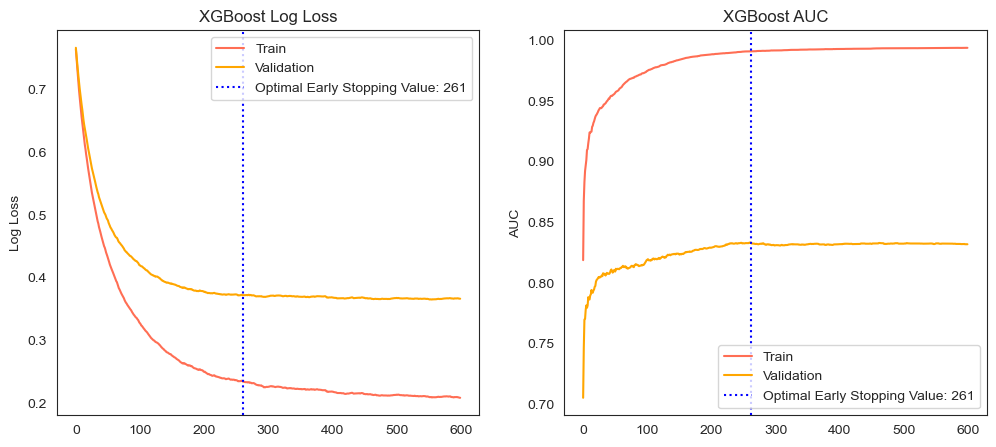

(XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.9098058574172024, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=['logloss', 'auc'], feature_types=None, gamma=6,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.028742624323945917,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=12, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=600, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 0.8515064343542176,
 0.032922214414721804)

In [164]:
def train_and_evaluate_with_cross_val(X, y, params):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=skf_seed)

    # Create XGBoost classifier
    xgb_model = xgb.XGBClassifier(**params)

    # Train the model
    xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)], verbose=False)

    # Retrieve performance metrics
    results = xgb_model.evals_result()
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, epochs)

    # Analyze log loss curve to determine optimal early stopping rounds
    logloss_results = results['validation_1']['logloss'] 
    optimal_rounds_logloss = np.argmin(logloss_results) + 1

    # Analyze AUC curve to determine optimal early stopping rounds
    auc_results = results['validation_1']['auc']
    optimal_rounds_auc = np.argmax(auc_results) + 1

    # Use the minimum of the two optimal rounds as the final early stopping point
    early_stopping_rounds = min(optimal_rounds_logloss, optimal_rounds_auc)

    # Retrain the model with the determined early stopping rounds
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=False,
        early_stopping_rounds=early_stopping_rounds
    )

    # Evaluate with Cross-Validation
    skf = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=skf_seed)
    cross_val_scores = cross_val_score(xgb_model, X, y, scoring='roc_auc', cv=skf)
    mean_auc = np.mean(cross_val_scores)
    std_auc = np.std(cross_val_scores)

    print(f"Mean ROC AUC with Cross-Validation: {mean_auc}")
    print(f"Std Dev of ROC AUC with Cross-Validation: {std_auc}")

    # Plot learning Curve
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot log loss
    axs[0].plot(x_axis, results['validation_0']['logloss'], label='Train')
    axs[0].plot(x_axis, results['validation_1']['logloss'], label='Validation')
    axs[0].legend()
    axs[0].set_ylabel('Log Loss')
    axs[0].set_title('XGBoost Log Loss')

    # Indicate optimal early stopping value on the plot
    axs[0].axvline(x=early_stopping_rounds, color='blue', linestyle=':', label=f'Optimal Early Stopping Value: {early_stopping_rounds}')
    axs[0].legend()

    # Plot AUC
    axs[1].plot(x_axis, results['validation_0']['auc'], label='Train')
    axs[1].plot(x_axis, results['validation_1']['auc'], label='Validation')
    axs[1].legend()
    axs[1].set_ylabel('AUC')
    axs[1].set_title('XGBoost AUC')

    # Indicate optimal early stopping value on the plot
    axs[1].axvline(x=early_stopping_rounds, color='blue', linestyle=':', label=f'Optimal Early Stopping Value: {early_stopping_rounds}')
    axs[1].legend()

    plt.savefig('learning_curve.jpg')
    plt.show()

    return xgb_model, mean_auc, std_auc

train_and_evaluate_with_cross_val(X, y, params)

Mean ROC AUC with Cross-Validation: 0.8590323183008942
Std Dev of ROC AUC with Cross-Validation: 0.03039678370020439


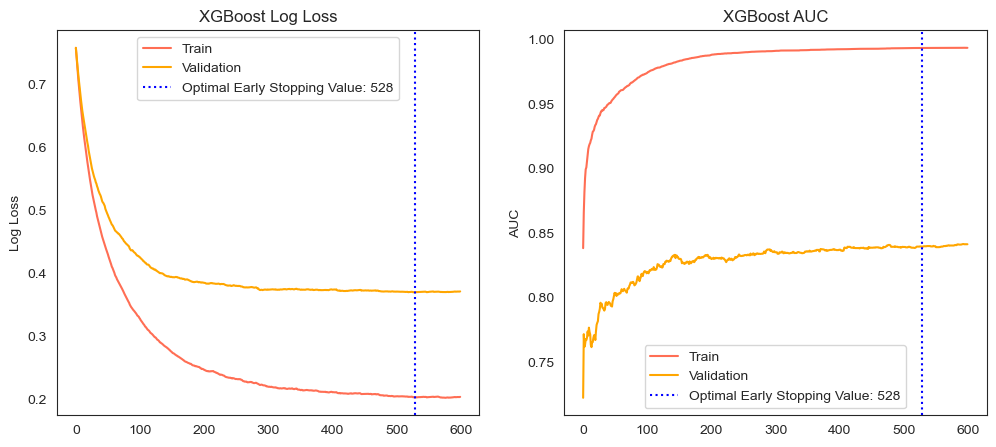


Training Set Metrics:
Mean ROC AUC Train: 0.9416
Mean Recall Train: 0.9756
Mean Accuracy Train: 0.9170
Mean Precision Train: 0.6388
Mean F1 Score Train: 0.7702

Validation Set Metrics:
Mean ROC AUC Val: 0.7730
Mean Recall Val: 0.6778
Mean Accuracy Val: 0.8418
Mean Precision Val: 0.4572
Mean F1 Score Val: 0.5428


In [175]:
def train_evaluate_predict_with_xgboost(X_train, y_train, X_test, params, early_stopping_rounds=100, random_state=skf_seed):
    """
    Trains an XGBoost model, evaluates performance with cross-validation, and predicts on test data.
    Generates validation data from the training set for early stopping.

    Args:
        X_train (array-like): Training features.
        y_train (array-like): Training target variable.
        X_test (array-like): Test features.
        params (dict): XGBoost model parameters.
        early_stopping_rounds (int, optional): Number of rounds for early stopping. Defaults to 100.
        random_state (int, optional): Random seed for reproducibility.

    Returns:
        tuple: Tuple containing the trained XGBoost model, mean ROC AUC score, and standard deviation of ROC AUC score.
        array-like: Predicted probabilities for the test data.
    """
    # Function 1: Training and evaluation with cross-validation
    skf = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=random_state)
    mean_auc_list = []
    std_auc_list = []

    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Create XGBoost classifier
        xgb_model = xgb.XGBClassifier(**params)

        # Train the model
        xgb_model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
            verbose=False
        )

        # Retrieve performance metrics
        results = xgb_model.evals_result()
        epochs = len(results['validation_0']['logloss'])
        x_axis = range(0, epochs)

        # Analyze log loss curve to determine optimal early stopping rounds
        logloss_results = results['validation_1']['logloss']
        optimal_rounds_logloss = np.argmin(logloss_results) + 1

        # Analyze AUC curve to determine optimal early stopping rounds
        auc_results = results['validation_1']['auc']
        optimal_rounds_auc = np.argmax(auc_results) + 1

        # Use the minimum of the two optimal rounds as the final early stopping point
        early_stopping_rounds = min(optimal_rounds_logloss, optimal_rounds_auc)

        # Retrain the model with the determined early stopping rounds
        xgb_model = xgb.XGBClassifier(**params)
        xgb_model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), (X_val_fold, y_val_fold)],
            verbose=False,
            early_stopping_rounds=early_stopping_rounds
        )

        # Evaluate on the validation set
        y_val_proba = xgb_model.predict_proba(X_val_fold)[:, 1]
        auc_score = roc_auc_score(y_val_fold, y_val_proba)

        mean_auc_list.append(auc_score)

    # Calculate mean and std of AUC scores across folds
    mean_auc = np.mean(mean_auc_list)
    std_auc = np.std(mean_auc_list)

    print(f"Mean ROC AUC with Cross-Validation: {mean_auc}")
    print(f"Std Dev of ROC AUC with Cross-Validation: {std_auc}")

    # Plot learning Curve
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot log loss
    axs[0].plot(x_axis, results['validation_0']['logloss'], label='Train')
    axs[0].plot(x_axis, results['validation_1']['logloss'], label='Validation')
    axs[0].legend()
    axs[0].set_ylabel('Log Loss')
    axs[0].set_title('XGBoost Log Loss')

    # Indicate optimal early stopping value on the plot
    axs[0].axvline(x=early_stopping_rounds, color='blue', linestyle=':', label=f'Optimal Early Stopping Value: {early_stopping_rounds}')
    axs[0].legend()

    # Plot AUC
    axs[1].plot(x_axis, results['validation_0']['auc'], label='Train')
    axs[1].plot(x_axis, results['validation_1']['auc'], label='Validation')
    axs[1].legend()
    axs[1].set_ylabel('AUC')
    axs[1].set_title('XGBoost AUC')

    # Indicate optimal early stopping value on the plot
    axs[1].axvline(x=early_stopping_rounds, color='blue', linestyle=':', label=f'Optimal Early Stopping Value: {early_stopping_rounds}')
    axs[1].legend()
    
    plt.show();

    # Function 2: Training and evaluation with metrics calculation
    metrics_train, metrics_val = [], []
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_val, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_val, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        xgb_model = xgb.XGBClassifier(**params)
        xgb_model.fit(X_train_val, y_train_val, eval_set=[(X_val, y_val)], verbose=False, early_stopping_rounds=early_stopping_rounds)
        train_pred = xgb_model.predict(X_train_val)  # Train set
        y_pred = xgb_model.predict(X_val)           # Validation set

        # Classification metric calculations
        train_metrics = (
            roc_auc_score(y_train_val, train_pred),
            recall_score(y_train_val, train_pred),
            accuracy_score(y_train_val, train_pred),
            precision_score(y_train_val, train_pred),
            f1_score(y_train_val, train_pred),
        )

        val_metrics = (
            roc_auc_score(y_val, y_pred),
            recall_score(y_val, y_pred),
            accuracy_score(y_val, y_pred),
            precision_score(y_val, y_pred),
            f1_score(y_val, y_pred),
        )

        # Append metrics to lists
        metrics_train.append(train_metrics)
        metrics_val.append(val_metrics)

    # Calculate means of metrics for Training set
    mean_metrics_train = np.mean(metrics_train, axis=0)

    # Calculate means of metrics for Validation set
    mean_metrics_val = np.mean(metrics_val, axis=0)

    # Display evaluation metrics for Training set
    print("\nTraining Set Metrics:")
    print(f"Mean ROC AUC Train: {mean_metrics_train[0]:.4f}")
    print(f"Mean Recall Train: {mean_metrics_train[1]:.4f}")
    print(f"Mean Accuracy Train: {mean_metrics_train[2]:.4f}")
    print(f"Mean Precision Train: {mean_metrics_train[3]:.4f}")
    print(f"Mean F1 Score Train: {mean_metrics_train[4]:.4f}")

    # Display evaluation metrics for Validation set
    print("\nValidation Set Metrics:")
    print(f"Mean ROC AUC Val: {mean_metrics_val[0]:.4f}")
    print(f"Mean Recall Val: {mean_metrics_val[1]:.4f}")
    print(f"Mean Accuracy Val: {mean_metrics_val[2]:.4f}")
    print(f"Mean Precision Val: {mean_metrics_val[3]:.4f}")
    print(f"Mean F1 Score Val: {mean_metrics_val[4]:.4f}")

    # Function 3: Prediction using the trained model
    y_pred_list = []

    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Create and train the XGBoost model
        xgb_model = xgb.XGBClassifier(**params)
        xgb_model.fit(
            X_train_fold, y_train_fold,
            eval_set=[(X_val_fold, y_val_fold)],
            verbose=False,
            early_stopping_rounds=early_stopping_rounds,
        )

        # Predict on the test set
        y_pred_fold = xgb_model.predict_proba(X_test)[:, 1]
        y_pred_list.append(y_pred_fold)

    # Average predictions across folds
    y_pred_avg = np.mean(y_pred_list, axis=0)

    # Return all relevant information
    return xgb_model, mean_auc, std_auc, mean_metrics_train, mean_metrics_val, y_pred_avg

trained_model, mean_auc, std_auc, mean_metrics_train, mean_metrics_val, predictions = train_evaluate_predict_with_xgboost(X, y, test_df, params)

In [184]:
predictions

array([0.5421957 , 0.2566322 , 0.23683977, ..., 0.17296727, 0.10170602,
       0.09607708], dtype=float32)

In [185]:
# make submissions

test_ = pd.read_csv('test.csv')
sub=pd.DataFrame({"id": test_["id"],"Attrition": predictions}).set_index("id")
sub.to_csv("2.csv")